## Overview 

The increasing frequency and intensity of cyclonic rainfall events pose significant threats to insurance markets in climate-vulnerable coastal regions. In Phase 2 of the World Bank Climate Risk Challenge, our team *DelphiQ* presents a working prototype that integrates **quantum-enhanced risk forecasting** and **portfolio optimization** to address such challenges in coastal New Zealand.

We focus on **risk prediction** and **risk diversification**, developing a hybrid framework that leverages:

- A **Quantum Reuploading Unit (QRU)** for time-series rainfall forecasting,
- A **QAOA-based Conditional Value-at-Risk optimizer** for regional insurance allocation,
- A **smart parametric payout logic** for inclusive, fast-response insurance.

This notebook outlines the **technical implementation of the prototype**, simulation results, data-driven insights, and real-world stakeholder impact. It is designed as a proof-of-concept combining quantum innovation with scalable climate resilience.

---

## 👥 Team DelphiQ

- **Jacinta May** – *Quantum Theorist & Lead* (BSc, Univ. of Sydney)  
  Co-founder of Pikkl. Expertise: Quantum hardware, environmental chemistry.

- **Sabarikirishwaran Ponnambalam** – *Quantum Algorithms* (PhD, Griffith University)  
  Specialist in QAOA, Variational Circuits, Quantum Optimization.

- **Léa Cassé** – *Quantum Machine Learning & Environmental Data* (PhD, Univ. of Waikato / École Polytechnique)  
  Expertise: QRU-based models, forecasting, TAIAO project collaborator.

- **Nicolas De Matteis** – *Business Lead* (BEng, UNSW)  
  Commercialization of quantum tech, environmental business ventures.

### 🌧️ Auckland Region – Eligible Rivers for Climate Risk Study

Rivers either within Auckland or under its greater hydrological influence (e.g., Franklin, Hauraki Plains, Coromandel). All are **≥ 50 km** in length and **≥ 2 m** in depth.

---

- **Marokopa River – Falls <span style="color: red;">[Selected for this Study]</span>** 
  • Depth: 2.25 m  
  • Region: Waikato / Auckland border  
  • Length: ~58 km  

- **Oraka Stream – Pinedale <span style="color: red;">[Selected for this Study]</span>** 
  • Depth: 2.01 m  
  • Region: Northern Waikato (Auckland catchment)  
  • Length: ~50+ km (assumed)

- **Waikato River (multiple sites) <span style="color: red;">[Selected for this Study]</span>**
  • Depths: 6.72 – 11.69 m  
  • Region: Hamilton → Auckland supply  
  • Length: 425 km  

- **Waipa River (Otewa, SH23, SH31)**  
  • Depths: 9.02 – 28.30 m  
  • Region: Waikato  
  • Length: 115 km  

- **Waihou River (Okauia, Te Aroha)**  
  • Depths: 2.38 – 7.35 m  
  • Region: Hauraki / Coromandel  
  • Length: ~150 km  

- **Ohinemuri River (Karangahake, Queens Head)**  
  • Depths: 2.80 – 5.84 m  
  • Region: Coromandel / Hauraki  
  • Length: ~70 km  

## Package installation

In [1]:
!pip install --no-cache-dir torch torchvision torchaudio -q
!pip install --no-cache-dir pytorch-lightning -q
!pip install --no-cache-dir custatevec-cu12 -q
!pip install --no-cache-dir lightning pennylane-lightning-gpu -q
!pip install --no-cache-dir pandas matplotlib -q
!pip install --no-cache-dir "jax[cuda12]" pennylane-catalyst -q

#!pip install "jax[cuda11_pip]==0.4.28" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 264.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 83.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 114.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 121.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 143.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 154.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 159.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 MB 178.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 223.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 176.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip uninstall flax orbax-checkpoint dopamine-rl tensorflow -y -q
!pip install flax==0.7.5 orbax-checkpoint==0.4.6 dopamine-rl==4.0.0 tensorflow==2.18.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 14.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.4/244.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.2 MB/s eta 0:00:00


## Data Preprocessing

In [3]:
import os
import io
import re
import gzip
import pandas as pd
import pennylane.numpy as np
from glob import glob
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

def impute_missing_with_average(series):
    """
    Impute missing values in a pandas Series by averaging the previous and next valid values.
    """
    series = series.copy()
    nan_indices = series[series.isna()].index

    for i in nan_indices:
        prev_idx = series.index[series.index.get_loc(i) - 1] if series.index.get_loc(i) > 0 else None
        next_idx = series.index[series.index.get_loc(i) + 1] if series.index.get_loc(i) < len(series) - 1 else None
        
        prev_val = series[prev_idx] if prev_idx is not None else np.nan
        next_val = series[next_idx] if next_idx is not None else np.nan
        
        if not np.isnan(prev_val) and not np.isnan(next_val):
            series.at[i] = (prev_val + next_val) / 2            
        elif not np.isnan(prev_val): # fallback
            series.at[i] = prev_val
        elif not np.isnan(next_val):
            series.at[i] = next_val
    return series


def load_weather_data(folder_path='.', datetime_format='%d-%b-%Y %H:%M'):
    """
    Load all .csv weather files (rainfall/wind) in folder_path.        
    """
    datasets = {}
    # headers
    expected_keywords = ['date', 'time', 'rain', 'wind']
    
    for file in glob(os.path.join(folder_path, '*.csv')):
        name = file.strip().replace('.csv','')
        name = re.sub(r'\s+', '', name)
        try:            
            with open(file, 'rt') as f:
                lines = f.readlines()
                            
            header_idx = 0
            for idx, line in enumerate(lines):
                tokens = set(line.strip().lower().split(" "))                
                if any(keyword in tokens for keyword in expected_keywords):
                    header_idx = idx
                    break                        
            
            # Load csv
            df = pd.read_csv(
                io.StringIO(''.join(lines[header_idx:])),
                dtype=str,
                low_memory=False
            )
            
            # Parse datetime
            if 'date' in df.columns and 'time' in df.columns:
                df['datetime'] = pd.to_datetime(
                    df['date'] + ' ' + df['time'],
                    format=datetime_format,
                    errors='coerce'
                )
                df.drop(columns=['date', 'time'], inplace=True)                
            else:
                # fallback
                dt_col = next((col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()), None) 
                df['datetime'] = pd.to_datetime(df[dt_col], format=datetime_format, errors='coerce')                
                df.drop(columns=[dt_col], inplace=True)
                        
            rename_map = {}
            for c in df.columns:
                lc = c.lower()
                if 'rain' in lc: 
                    rename_map[c] = 'rainfall_mm'
                if 'wind' in lc and 'speed' in lc:
                    rename_map[c] = 'wind_speed_mps'
            df.rename(columns=rename_map, inplace=True)
            df['wind_speed_mps'] = df['wind_speed_mps'].str.strip().replace({'VRB': np.nan, 'NA': np.nan, 'NaN': np.nan, 'na': np.nan})
                        
            df = df[['datetime', 'rainfall_mm', 'wind_speed_mps']].copy()                        

            #Cast to numeric
            df['rainfall_mm'] = pd.to_numeric(df['rainfall_mm'], errors='coerce')
            df['wind_speed_mps'] = pd.to_numeric(df['wind_speed_mps'], errors='coerce')

            #impute missing values
            df['rainfall_mm'] = impute_missing_with_average(df['rainfall_mm'])
            df['wind_speed_mps'] = impute_missing_with_average(df['wind_speed_mps'])

            df = df.dropna(subset=['datetime', 'rainfall_mm', 'wind_speed_mps'])                                
            
            df = df.sort_values('datetime').reset_index(drop=True)
            start_date = pd.Timestamp('2019-10-21')
            df = df[df['datetime'] >= start_date]                
            print(f"Weather loaded: {name} ({len(df)} rows)")
        
        except Exception as e:
            print(f"Skipping {name}: {e}")
            
    return df

def load_river_level_data(folder_path='.', river_sites=None, datetime_format='%Y-%m-%d %H:%M:%S'):
    """
    Load river level csv for specified river_sites.        
    """
    if river_sites is None:
        river_sites = ['waikato', 'waipa', '']
    datasets = {}
    expected_cols = ['date', 'time', 'wlvalue', 'flvalue']
    for file in glob(os.path.join(folder_path, '*.csv')) + glob(os.path.join(folder_path, '*.csv')):
        name = os.path.basename(file)
        
        if not any(site.lower() in name.lower() for site in river_sites):
            continue
        try:            
            opener = gzip.open if file.endswith('.gz') else open
            with opener(file, 'rt') as f:
                lines = f.readlines()
            
            header_idx = 0
            for idx, line in enumerate(lines):
                tokens = set(line.strip().lower().replace(',',' ').split())                
                if any(keyword in tokens for keyword in expected_cols):
                    header_idx = idx
                    break
                                
            df = pd.read_csv(
                io.StringIO(''.join(lines[header_idx:])),
                dtype=str, low_memory=False
            )            
                    
            if 'date' in df.columns and 'time' in df.columns:                
                df['dt'] = df['date'] + ' ' + df['time']                                
                df['datetime'] = pd.to_datetime(
                    df['dt'],
                    format=datetime_format,
                    errors='coerce'
                )                
                df.drop(columns=['date', 'time', 'dt'], inplace=True)                
                        
            df['river_level'] = df['wlvalue'].astype(float)
            # impute missing data
            df['river_level'] = impute_missing_with_average(df['river_level'])
            df = df.dropna(subset=['datetime', 'river_level'])
            df = df[['datetime', 'river_level']].sort_values('datetime')
            df = df.set_index('datetime')
            
            #resample data hourly
            df = df.resample('h').ffill()  
            print(f"River loaded: {name} ({len(df)} rows)")
            datasets[name] = df
        except Exception as e:
            print(f"Skipping river {name}: {e}")
    return datasets

def merge_weather_and_river(weather_df, river_df):
    """
    Merge weather and river level data on exact datetime match (inner join).    
    """
    weather_df = weather_df.copy()
    river_df = river_df.copy()    
    
    # Inner join on datetime match
    merged = pd.merge(weather_df, river_df, on='datetime', how='inner')

    #print(f"Merged {len(merged)} rows on datetime match")

    return merged

def visualize_merged_data(data, threshold=150, title='Merged Timeseries'):
    """
    Plot rainfall and river level with threshold line.
    """
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(data['datetime'], data['rainfall_mm'], label='Rainfall (mm)', color='blue')
    ax1.set_xlabel('Datetime'); ax1.set_ylabel('Rainfall (mm)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')    
    
    ax2 = ax1.twinx()
    ax2.plot(data['datetime'], data['river_level'], label='River Level (m)', color='green')
    ax2.set_ylabel('River Level (m)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    #fig.tight_layout()
    plt.title(title)
    fig.legend()
    plt.show()

# Load data
weather_data = load_weather_data(folder_path='/kaggle/input/wbcfull/rainfall_data')
river_data = load_river_level_data(folder_path='/kaggle/input/wbcfull/riverlevel_data', river_sites=['waikato','waipa', 'waihou'])
merged_data = {}

# Merge matching datasets
for rname, rdata in river_data.items():
    merged_data[rname] = merge_weather_and_river(weather_data, rdata)

key = next(iter(merged_data))
df_merge = merged_data[key]

Weather loaded: /kaggle/input/wbcfull/rainfall_data/Observations_Hourly_Auckland_Aerodrome_NZAAA_1993Jan01_2025May23 (48985 rows)
River loaded: River Level - Waipa River - SH23 Br Whatawhata - 1st Jan 2019 - 23rd May 2025.csv (48960 rows)
River loaded: RiverLevel-WaipaRiver-Otewa-1stJan 1993-23rdMay2025.csv (48960 rows)
River loaded: River Level - Waihou River - Te Aroha - ADCP - 1st Jan 2019 - 23rd May 2025.csv (48960 rows)
River loaded: River Level - Waikato River - Ngaruawahia Cableway - 1st Jan 2019 - 23rd May 2025.csv (48960 rows)
River loaded: River Level - Waihou River - Okauia - 1st Jan 2019 - 23rd May 2025.csv (45576 rows)
River loaded: River Level - Waikato River - Huntly Power Station - 1st Jan 2019 - 23rd May 2025.csv (48960 rows)
River loaded: RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv (48960 rows)
River loaded: River Level - Waipa River - SH23 Br Whatawhata - 1st Jan 2019 - 23rd May 2025.csv (48960 rows)
River loaded: RiverLevel-WaipaRiver-Otewa-

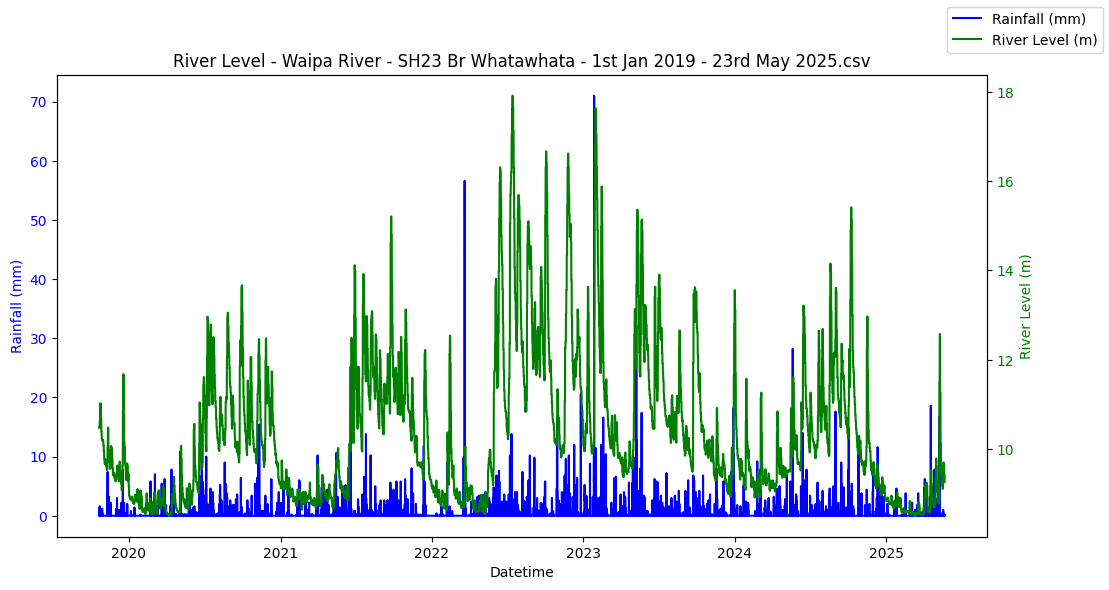

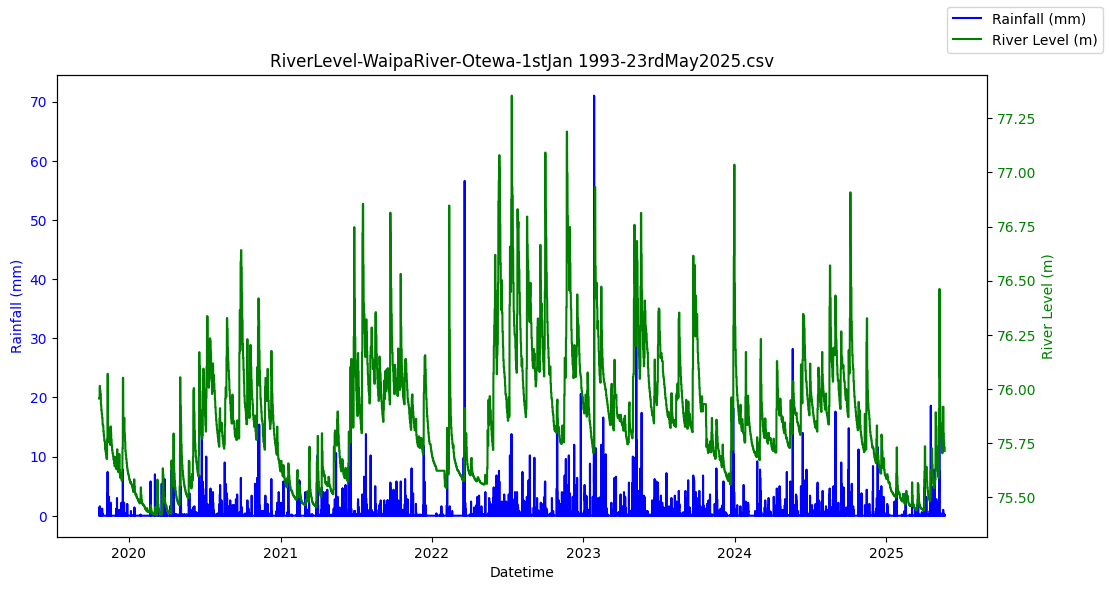

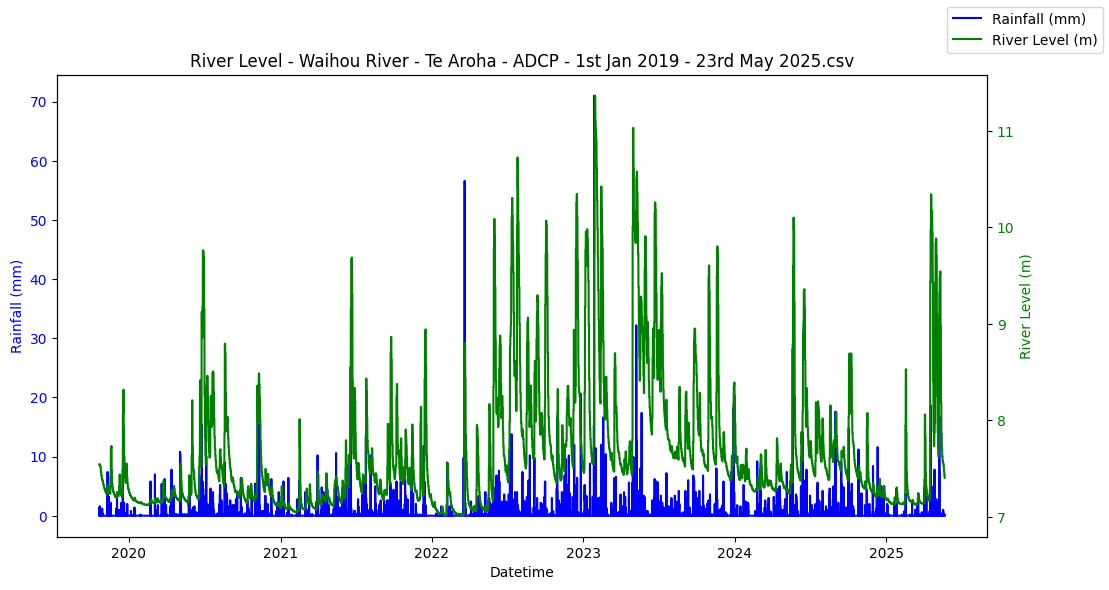

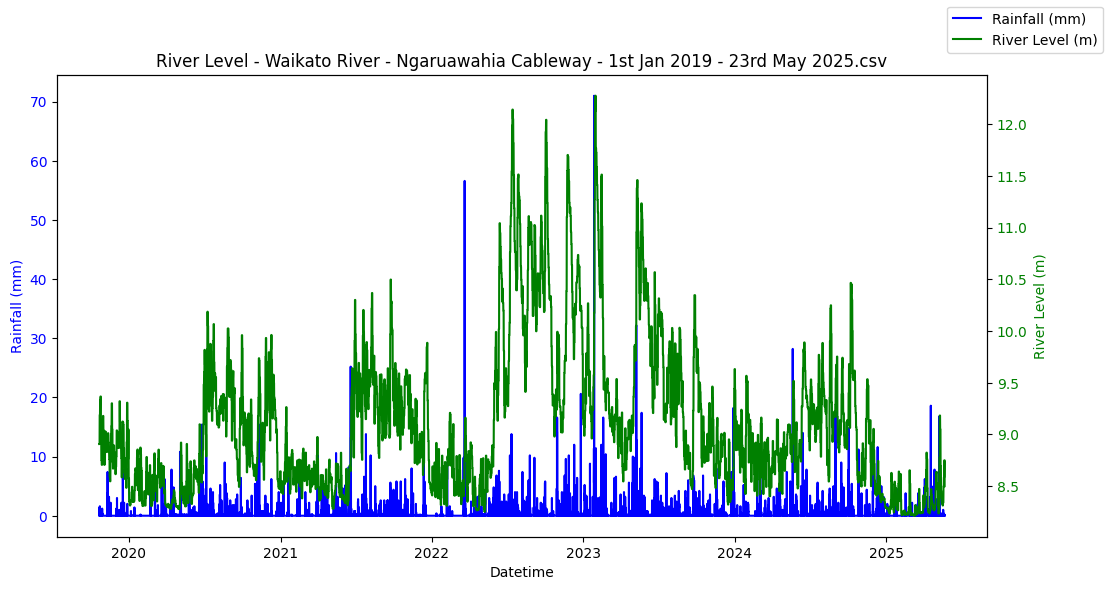

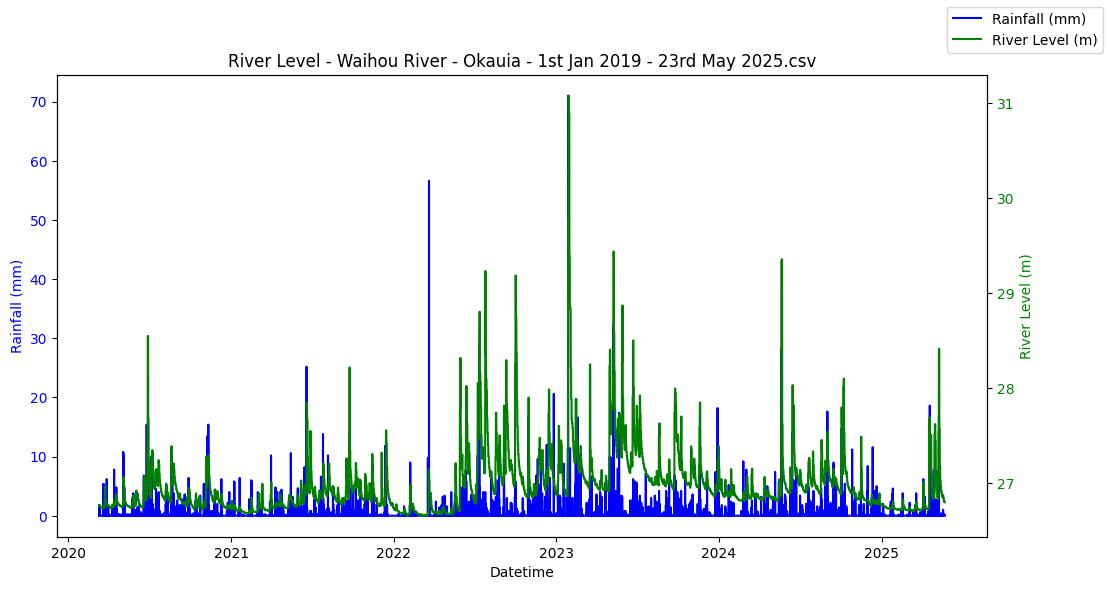

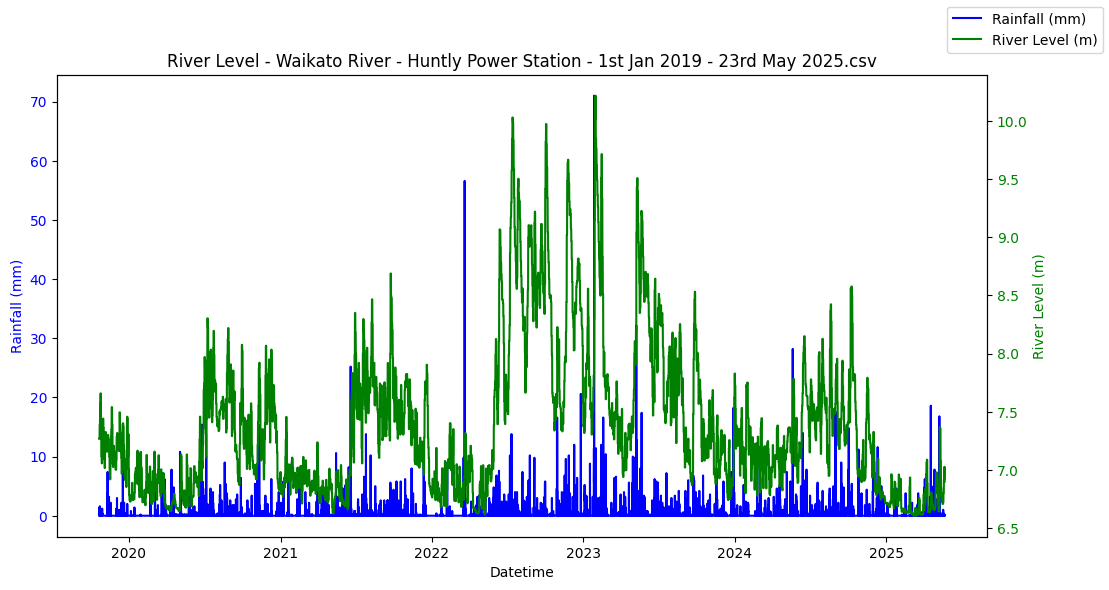

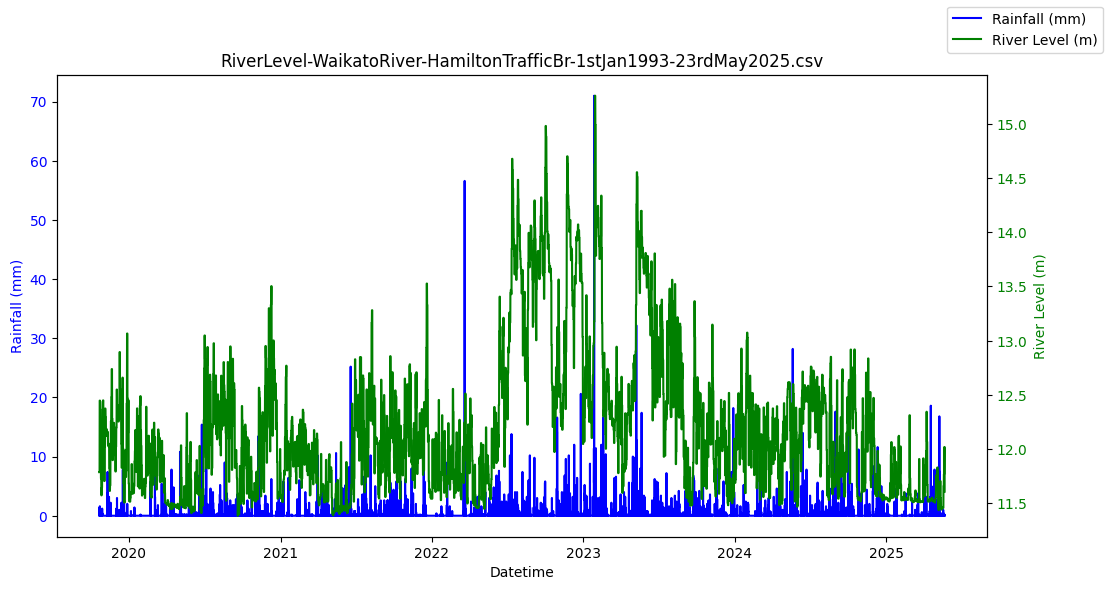

In [4]:
# Visualize
for key, df_merge in merged_data.items():    
    visualize_merged_data(df_merge, title=key)

In [5]:
print(merged_data.keys())
merged_data['RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv'].to_csv('hamilton_riverlevel.csv', index=False)
merged_data['RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv']

dict_keys(['River Level - Waipa River - SH23 Br Whatawhata - 1st Jan 2019 - 23rd May 2025.csv', 'RiverLevel-WaipaRiver-Otewa-1stJan 1993-23rdMay2025.csv', 'River Level - Waihou River - Te Aroha - ADCP - 1st Jan 2019 - 23rd May 2025.csv', 'River Level - Waikato River - Ngaruawahia Cableway - 1st Jan 2019 - 23rd May 2025.csv', 'River Level - Waihou River - Okauia - 1st Jan 2019 - 23rd May 2025.csv', 'River Level - Waikato River - Huntly Power Station - 1st Jan 2019 - 23rd May 2025.csv', 'RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv'])


,datetime,rainfall_mm,wind_speed_mps,river_level
0,2019-10-21 01:00:00,0.2,8.8,11.787
1,2019-10-21 02:00:00,0.0,8.8,11.787
2,2019-10-21 03:00:00,0.0,8.8,11.787
3,2019-10-21 04:00:00,0.0,8.8,11.787
4,2019-10-21 05:00:00,0.0,8.8,11.787
...,...,...,...,...
48955,2025-05-21 20:00:00,0.0,0.5,12.019
48956,2025-05-21 21:00:00,0.0,1.0,12.019
48957,2025-05-21 22:00:00,0.0,0.5,12.019
48958,2025-05-21 23:00:00,0.0,0.5,12.019


# New Model - Lea

In [ ]:
# helpers
import random
import pandas as pd
import pennylane as qml
import numpy as np
import torch
import matplotlib.pyplot as plt
import csv
from tqdm import trange
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

nb_reuploading = 3
lookback = 6  # window size
feature_col = ['rainfall_mm','wind_speed_mps']
X_features = len(feature_col)
target_col = ['river_level']
y_features = len(target_col)

nb_qubit_reupload = X_features
num_variational = 3
nb_epoch = 50
lr = 0.01
batch_size = 8

dev_reupload = qml.device("default.qubit", wires=nb_qubit_reupload, shots=None)

def generate_windowed_dataset(data, lookback=6, feature_cols=None, target_col='river_level'):
    """
    Create (X, y) with features from lookback hours    
    """
    if feature_cols is None:
        feature_cols = [c for c in ['rainfall_mm','wind_speed_mps'] if c in data.columns]
    X, y = [], []
    for i in range(len(data) - lookback):
        window = data[feature_cols].iloc[i:i+lookback].values
        target = data[target_col].iloc[i + lookback]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

def encoding_layer(params_encoding, x, lookback, nb_qubit):        
    x = x.reshape(-1, lookback, X_features)
    #print("params_encoding.shape, x.shape", params_encoding.shape, x.shape)
    
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(X_features):
        for j in range(lookback):            
            gate = rotation_gates[j % len(rotation_gates)]            
            gate(params_encoding[q,j] * x[:,j,q], wires=q)

def variational_layer(params_variational, lookback, nb_qubit, num_variational):
    #print("params_variational.shape", params_variational.shape)
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(nb_qubit):
        for k in range(num_variational):
            gate = rotation_gates[k % len(rotation_gates)]                        
            gate(params_variational[q, k], wires=q)

@qml.qnode(dev_reupload, interface="torch", diff_method="backprop")
def quantum_circuit_reupload(x, params):
    params_enc, params_var, ent_wieghts = params        
    for i in range(nb_reuploading):
        encoding_layer(params_enc[i], x, lookback, nb_qubit_reupload)
        variational_layer(params_var[i], lookback, nb_qubit_reupload, num_variational)

    qml.StronglyEntanglingLayers(weights=ent_wieghts, wires=range(nb_qubit_reupload))    
    #return  [qml.expval(qml.PauliZ(i)) for i in range(nb_qubit_reupload)]
    return qml.expval(qml.PauliZ(0))

def prediction_accuracy(y_pred, y_true, tolerance=0.1):
    correct = torch.sum(torch.abs(y_pred - y_true) < tolerance)
    return 100 * correct / len(y_true)

def split_data(data, test_ratio, val_ratio, lookback, target_col):
   
    X, y = generate_windowed_dataset(data, lookback=lookback, target_col=target_col)
    n = len(X)
    
    test_size = int(n * test_ratio)
    val_size = int(n * val_ratio)
    train_size = n - val_size - test_size

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test


def plot_metrics(loss_hist, acc_hist, grad_norm_hist, name):
    epochs = range(1, len(loss_hist)+1)
    plt.figure()
    plt.plot(epochs, loss_hist, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{name}: Test Loss over Epochs")
    plt.legend()
    plt.savefig(f"{name}_loss_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, acc_hist, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{name}: Test Accuracy over Epochs")
    plt.legend()
    plt.savefig(f"{name}_accuracy_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, grad_norm_hist, label="Gradient Norm")
    plt.xlabel("Epochs")
    plt.ylabel("L2 Norm")
    plt.title(f"{name}: Gradient Norm over Epochs")
    plt.legend()
    plt.savefig(f"{name}_gradnorm_plot.png", dpi=300)
    plt.close()

def plot_predictions(y_true, y_pred, name):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label="Ground Truth", linewidth=2)
    plt.plot(y_pred, label="Predictions", linestyle="--")
    plt.xlabel("Index")
    plt.ylabel("Normalized Value")
    plt.title(f"{name}: Predictions vs Ground Truth")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{name}_prediction_plot.png", dpi=300)
    plt.close()

In [ ]:
# qru_torch.py
import random
import csv
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from torchmetrics import MeanSquaredError, MeanAbsoluteError
from tqdm import tqdm
import pennylane as qml
from sklearn.preprocessing import MinMaxScaler

# ----------------------------- reproducibility -----------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ----------------------------- hyper-parameters ----------------------------
NB_REUPLOAD   = 3
LOOKBACK      = 3                    # time steps
NB_VAR        = 5                    # params per step
BATCH_SIZE    = 1
N_EPOCHS      = 30
LR            = 1e-2
ACC_TOL       = 0.10                 # |pred-true| ≤ tol → hit

# ----------------------------- data ----------------------------------------
feature_cols = ["rainfall_mm", "wind_speed_mps"]
target_col   = ["river_level"]

# ❶  load your DataFrame "data"  (example line)
data = merged_data["RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv"].iloc[-3230:].copy()

# ❷  split into windows with your helper split_data(...)
X_tr_np, y_tr_np, X_val_np, y_val_np, X_te_np, y_te_np = split_data(
    data, test_ratio=0.2, val_ratio=0.1, lookback=LOOKBACK, target_col=target_col
)
X_features = len(feature_cols)
# ❸  scale
# sx, sy = MinMaxScaler(), MinMaxScaler()
# X_tr_2d = X_tr.reshape(-1, len(feature_cols))
# sx.fit(X_tr_2d)
# sy.fit(y_tr.reshape(-1, 1))

# def scale_X(x): return sx.transform(x.reshape(-1, len(feature_cols))).reshape(x.shape)
# def scale_y(y): return sy.transform(y.reshape(-1, 1)).reshape(-1)

# X_tr, X_val, X_te = map(scale_X, (X_tr, X_val, X_te))
# y_tr, y_val, y_te = map(scale_y, (y_tr, y_val, y_te))


# Fit scaler on training set only
X_tr_np_2d = X_tr_np.reshape(-1, X_features)
scaler_X.fit(X_tr_np_2d)
X_tr_np_scaled = scaler_X.transform(X_tr_np_2d).reshape(X_tr_np.shape)
X_te_np_scaled = scaler_X.transform(X_te_np.reshape(-1, X_features)).reshape(X_te_np.shape)

scaler_y.fit(y_tr_np.reshape(-1, 1))
y_tr_np_scaled = scaler_y.transform(y_tr_np.reshape(-1, 1)).reshape(-1)
y_te_np_scaled = scaler_y.transform(y_te_np.reshape(-1, 1)).reshape(-1)

# --- Validation set ---
X_val_np_2d = X_val_np.reshape(-1, X_features)
X_val_np_scaled = scaler_X.transform(X_val_np_2d).reshape(X_val_np.shape)

y_val_np_2d = y_val_np.reshape(-1, 1)
y_val_np_scaled = scaler_y.transform(y_val_np_2d).reshape(-1)

# ❹  torch tensors & loaders
device   = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tr_t   = torch.tensor(X_tr_np_scaled,  dtype=torch.float32)
y_tr_t   = torch.tensor(y_tr_np_scaled,  dtype=torch.float32)
X_val_t  = torch.tensor(X_val_np_scaled, dtype=torch.float32)
y_val_t  = torch.tensor(y_val_np_scaled, dtype=torch.float32)
X_te_t   = torch.tensor(X_te_np_scaled,  dtype=torch.float32)
y_te_t   = torch.tensor(y_te_np_scaled,  dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_tr_t, y_tr_t), batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
test_loader = DataLoader(TensorDataset(X_tr_t, y_tr_t), batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

# ----------------------------- quantum model -------------------------------
# Pennylane device and QNode
dev = qml.device("default.qubit", wires=1)

def qru_qnode(inputs, thetas):
    """Quantum Re-Upload circuit: inputs shape (LOOKBACK, 2)"""    
    for l in range(NB_REUPLOAD):
        for t in range(LOOKBACK):
            inputs = inputs.reshape(-1, LOOKBACK, 2)
            print(inputs[:,t,0])
            th0, th1, th2, th3, th4 = thetas[l, t]
            qml.RX(th0 * inputs[:,t,0],   wires=0)
            qml.RY(th1,       wires=0)
            qml.RY(th2 * inputs[:,t,1], wires=0)
            qml.RZ(th3,       wires=0)
            qml.RY(th4,       wires=0)
    return qml.expval(qml.PauliZ(0))

# Wrap into TorchLayer
weight_shapes = {"thetas": (NB_REUPLOAD, LOOKBACK, NB_VAR)}
qnode         = qml.QNode(qru_qnode, dev, interface="torch")
model         = qml.qnn.TorchLayer(qnode, weight_shapes).to(device)

# ----------------------------- loss & metrics ------------------------------
criterion  = nn.MSELoss()
metric_mse = MeanSquaredError().to(device)
metric_mae = MeanAbsoluteError().to(device)   # for ≤ tol accuracy we’ll code small helper

@torch.no_grad()
def tolerance_accuracy(pred, target, tol=ACC_TOL):
    return (torch.abs(pred - target) <= tol).float().mean()

# ----------------------------- training loop -------------------------------
optimizer = Adam(model.parameters(), lr=LR)

with open("metrics_qru.csv", "w", newline="") as fcsv:
    csv_writer = csv.writer(fcsv)
    csv_writer.writerow(
        ["epoch", "train_mse", "train_acc", "val_mse", "val_acc", "grad_norm"]
    )

    for epoch in range(1, N_EPOCHS + 1):
        model.train()
        grad_norm_epoch = []
        pbar = tqdm(train_loader, desc=f"Epoch {epoch}", leave=False)

        for xb, yb in pbar:
            xb, yb = xb.to(device), yb.to(device)

            optimizer.zero_grad()
            preds = (1 - model(xb.reshape(BATCH_SIZE,-1))) / 2           # map Z-expectation → [0,1]
            loss  = criterion(preds, yb)
            loss.backward()

            # gradient norm
            grad_norm_epoch.append(
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=float("inf")).item()
            )
            optimizer.step()
            pbar.set_postfix(loss=loss.item())

        # --------------------- metrics ---------------------
        model.eval()
        with torch.no_grad():
            # TRAIN
            for xb, yb in train_loader:
                preds_tr = model(xb.reshape(BATCH_SIZE,-1))           # map Z-expectation → [0,1]                                        
                mse_tr   = metric_mse(preds_tr.cpu(), yb.cpu())
                acc_tr   = tolerance_accuracy(preds_tr.cpu(), yb.cpu())

            # VAL
            preds_val = torch.cat([model(bx.reshape(BATCH_SIZE,-1).to(device)) for bx, _ in val_loader]).squeeze()
            preds_te_y = torch.cat([y.reshape(BATCH_SIZE,-1).to(device) for _, y in val_loader]).squeeze()
            mse_val   = metric_mse(preds_val.cpu(), preds_te_y.cpu())
            acc_val   = tolerance_accuracy(preds_val.cpu(), preds_te_y.cpu())

        csv_writer.writerow(
            [epoch, mse_tr.item(), acc_tr.item(), mse_val.item(), acc_val.item(), np.mean(grad_norm_epoch)]
        )
        print(
            f"Epoch {epoch:02d} | "
            f"Train MSE {mse_tr:.5f}  Acc {acc_tr:.3f} | "
            f"Val MSE {mse_val:.5f}  Acc {acc_val:.3f}"
        )

# ----------------------------- save model ----------------------------------
torch.save(model.state_dict(), "qru_thetas_trained.pt")
print("✓ parameters saved to qru_thetas_trained.pt")

# ----------------------------- test predictions ----------------------------
model.eval()
with torch.no_grad():
    preds_test = X_te_t.reshape(BATCH_SIZE,-1).to(device)
preds_test = preds_test.cpu().numpy()

# Invert scaling for convenience if desired
# y_pred_real = sy.inverse_transform(preds_test.reshape(-1,1)).reshape(-1)

# ----------------------------- export preds -------------------------------
df_preds = pd.DataFrame({
    "y_true": y_te,
    "y_pred": preds_test,
    # add dates_test here if available
})
df_preds.to_csv("predictions_qru.csv", index=False)
print("✓ predictions saved to predictions_qru.csv")

## QRU model for River Level Forecasting

In [ ]:
import random
import pandas as pd
import pennylane as qml
import numpy as np
import torch
import matplotlib.pyplot as plt
import csv
from tqdm import trange
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

nb_reuploading = 3
lookback = 24  # window size
feature_col = ['rainfall_mm','wind_speed_mps']
X_features = len(feature_col)
target_col = ['river_level']
y_features = len(target_col)

nb_qubit_reupload = X_features
num_variational = 3
nb_epoch = 50
lr = 0.01
batch_size = 8

dev_reupload = qml.device("default.qubit", wires=nb_qubit_reupload, shots=None)

def generate_windowed_dataset(data, lookback=24, feature_cols=None, target_col='river_level'):
    """
    Create (X, y) with features from lookback hours    
    """
    if feature_cols is None:
        feature_cols = [c for c in ['rainfall_mm','wind_speed_mps'] if c in data.columns]
    X, y = [], []
    for i in range(len(data) - lookback):
        window = data[feature_cols].iloc[i:i+lookback].values
        target = data[target_col].iloc[i + lookback]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

def encoding_layer(params_encoding, x, lookback, nb_qubit):        
    x = x.reshape(-1, lookback, X_features)
    #print("params_encoding.shape, x.shape", params_encoding.shape, x.shape)
    
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(X_features):
        for j in range(lookback):            
            gate = rotation_gates[j % len(rotation_gates)]            
            gate(params_encoding[q,j] * x[:,j,q], wires=q)

def variational_layer(params_variational, lookback, nb_qubit, num_variational):
    #print("params_variational.shape", params_variational.shape)
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(nb_qubit):
        for k in range(num_variational):
            gate = rotation_gates[k % len(rotation_gates)]                        
            gate(params_variational[q, k], wires=q)

@qml.qnode(dev_reupload, interface="torch", diff_method="backprop")
def quantum_circuit_reupload(x, params):
    params_enc, params_var, ent_wieghts = params        
    for i in range(nb_reuploading):
        encoding_layer(params_enc[i], x, lookback, nb_qubit_reupload)
        variational_layer(params_var[i], lookback, nb_qubit_reupload, num_variational)

    qml.StronglyEntanglingLayers(weights=ent_wieghts, wires=range(nb_qubit_reupload))    
    #return  [qml.expval(qml.PauliZ(i)) for i in range(nb_qubit_reupload)]
    return qml.expval(qml.PauliZ(0))

def prediction_accuracy(y_pred, y_true, tolerance=0.1):
    correct = torch.sum(torch.abs(y_pred - y_true) < tolerance)
    return 100 * correct / len(y_true)

def split_data(data, test_ratio, val_ratio, lookback, target_col):
   
    X, y = generate_windowed_dataset(data, lookback=lookback, target_col=target_col)
    n = len(X)
    
    test_size = int(n * test_ratio)
    val_size = int(n * val_ratio)
    train_size = n - val_size - test_size

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test


def plot_metrics(loss_hist, acc_hist, grad_norm_hist, name):
    epochs = range(1, len(loss_hist)+1)
    plt.figure()
    plt.plot(epochs, loss_hist, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{name}: Test Loss over Epochs")
    plt.legend()
    plt.savefig(f"{name}_loss_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, acc_hist, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{name}: Test Accuracy over Epochs")
    plt.legend()
    plt.savefig(f"{name}_accuracy_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, grad_norm_hist, label="Gradient Norm")
    plt.xlabel("Epochs")
    plt.ylabel("L2 Norm")
    plt.title(f"{name}: Gradient Norm over Epochs")
    plt.legend()
    plt.savefig(f"{name}_gradnorm_plot.png", dpi=300)
    plt.close()

def plot_predictions(y_true, y_pred, name):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label="Ground Truth", linewidth=2)
    plt.plot(y_pred, label="Predictions", linestyle="--")
    plt.xlabel("Index")
    plt.ylabel("Normalized Value")
    plt.title(f"{name}: Predictions vs Ground Truth")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{name}_prediction_plot.png", dpi=300)
    plt.close()

def train_and_eval(model, params_init, X_tr, y_tr, X_te, y_te, name, epochs, lr):
    params = [p.clone().detach().requires_grad_(True) for p in params_init]
    opt = torch.optim.Adam(params, lr=lr)
    loss_hist, acc_hist, grad_norm_hist = [], [], []
    param_count = sum(p.numel() for p in params if p.requires_grad)
    print(f"Trainable parameters: {param_count}")    
    mse_loss = torch.nn.MSELoss()
    train_ds = TensorDataset(X_tr, y_tr)    
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False, pin_memory=False, num_workers=0)
    

    with open(f"{name}_metrics.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "test_loss", "test_acc", "grad_norm"])

        progress_bar = trange(epochs, desc=f"Training {name}")
        best_loss = float("inf")
        best_epoch = -1

        for ep in progress_bar:        
            for X_batch, y_batch in train_loader:
                #print("X_batch, y_batch shapes", X_batch.shape, y_batch.shape)
                opt.zero_grad()                
                preds = model(X_batch, params)
                #print("preds.shape", preds.shape)
                #preds = torch.stack(preds) if isinstance(preds, list) else preds                
                loss = mse_loss(preds.squeeze(), y_batch.squeeze())
                loss.backward()
                            
                total_norm = 0.0
                for p in params:
                    if p.grad is not None:
                        param_norm = p.grad.data.norm(2)
                        total_norm += param_norm.item() ** 2
                grad_norm = total_norm ** 0.5
                
                opt.step()

            with torch.no_grad():                   
                preds_t = model(X_te, params)
                loss_t = mse_loss(preds_t.squeeze(), y_te.squeeze()).item()
                acc_t = prediction_accuracy(preds_t, y_te).item()

            loss_hist.append(loss_t)
            acc_hist.append(acc_t)
            grad_norm_hist.append(grad_norm)

            if loss_t < best_loss:
                best_loss = loss_t
                best_epoch = ep + 1

            progress_bar.set_postfix({
                "Loss": f"{loss_t:.4f}",
                "Acc": f"{acc_t:.2f}%",
                "GradNorm": f"{grad_norm:.4f}",
                "BestEpoch": best_epoch
            })

            writer.writerow([ep+1, loss_t, acc_t, grad_norm])
            f.flush()

    plot_metrics(loss_hist, acc_hist, grad_norm_hist, name)
    torch.save([p.detach() for p in params], f"{name}_trained_params.pt")

    with torch.no_grad():
        #preds_final = torch.stack([model(params, x) for x in X_te])
        preds_final = model(X_te, params)
        with open(f"{name}_predictions.csv", "w", newline="") as f_pred:
            writer = csv.writer(f_pred)
            writer.writerow(["Index", "Actual", "Predicted"])
            for i, (true_val, pred_val) in enumerate(zip(y_te, preds_final)):
                writer.writerow([i, true_val.item(), pred_val.item()])
        plot_predictions(y_te.cpu().numpy(), preds_final.cpu().numpy(), name)
    print("Training Completed successfully!")

def draw_quantum_circuit():
    dummy_x = torch.rand((batch_size, lookback, X_features), dtype=torch.float64)
    
    dummy_params = [
        torch.ones((nb_reuploading, nb_qubit_reupload, lookback), dtype=torch.float64) * np.pi,
        torch.ones((nb_reuploading, nb_qubit_reupload, num_variational), dtype=torch.float64) * np.pi,
        torch.ones(qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=nb_qubit_reupload), dtype=torch.float64) * np.pi
    ]

    # Draw circuit    
    fig, ax = qml.draw_mpl(quantum_circuit_reupload, decimals=2, style="pennylane")(dummy_x, dummy_params)
    fig.savefig("/kaggle/working/QRU_circuit.png", dpi=600)
    plt.show()

#data = merged_data['RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv'].iloc[-32300:].copy() # Due to limited compute - trainning on last one year of data 
data = merged_data['RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv']
print(f"Data shape: {data.shape}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
draw_quantum_circuit()

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_tr_np, y_tr_np, X_te_np, y_te_np = split_data(data=data, test_ratio=0.2, lookback=lookback, target_col=target_col)

# Fit scaler on training set only
X_tr_np_2d = X_tr_np.reshape(-1, X_features)
scaler_X.fit(X_tr_np_2d)
X_tr_np_scaled = scaler_X.transform(X_tr_np_2d).reshape(X_tr_np.shape)
X_te_np_scaled = scaler_X.transform(X_te_np.reshape(-1, X_features)).reshape(X_te_np.shape)

scaler_y.fit(y_tr_np.reshape(-1, 1))
y_tr_np_scaled = scaler_y.transform(y_tr_np.reshape(-1, 1)).reshape(-1)
y_te_np_scaled = scaler_y.transform(y_te_np.reshape(-1, 1)).reshape(-1)


X_tr = torch.tensor(X_tr_np_scaled, dtype=torch.float64).to(device)
y_tr = torch.tensor(y_tr_np_scaled, dtype=torch.float64).to(device)
X_te = torch.tensor(X_te_np_scaled, dtype=torch.float64).to(device)
y_te = torch.tensor(y_te_np_scaled, dtype=torch.float64).to(device)

ent_shape = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=nb_qubit_reupload)

params_init_reupload = [
    torch.full((nb_reuploading, nb_qubit_reupload, lookback), np.pi, dtype=torch.float64, requires_grad=True).to(device),
    torch.full((nb_reuploading, nb_qubit_reupload, num_variational), np.pi, dtype=torch.float64, requires_grad=True).to(device),
    torch.full((ent_shape), np.pi, dtype=torch.float64, requires_grad=True).to(device)
]

train_and_eval(quantum_circuit_reupload, params_init_reupload, X_tr, y_tr, X_te, y_te, "QRU_Waikato", nb_epoch, lr)

# refactored new @qjit

In [ ]:
import random
import pandas as pd
import os
#os.environ["JAX_PLATFORM_NAME"] = "gpu"
import jax
import jax.numpy as jnp
import pennylane as qml
import numpy as np
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import trange
import csv



# --- Reproducibility ---
seed = 42
random.seed(seed)
np.random.seed(seed)
jax_key = jax.random.PRNGKey(seed)

# --- Hyperparameters ---
nb_reuploading = 3
lookback = 24  # window size
def_feature_cols = ["rainfall_mm", "wind_speed_mps"]
X_features = len(def_feature_cols)
target_col = "river_level"
batch_size = 8
nb_epoch = 50
lr = 0.01
test_ratio = 0.2
val_ratio = 0.1

# Quantum setup
nb_qubit_reupload = X_features
num_variational = 3
# Use lightning.gpu if available, otherwise lightning.qubit will default to CPU
dev_reupload = qml.device("lightning.qubit", wires=nb_qubit_reupload, shots=None)

# --- Data Utilities ---
def generate_windowed_dataset(data, lookback=lookback, feature_cols=None, target_col=target_col):
    if feature_cols is None:
        feature_cols = def_feature_cols
    X, y = [], []
    for i in range(len(data) - lookback):
        window = data[feature_cols].iloc[i:i+lookback].values
        target = data[target_col].iloc[i + lookback]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

def split_data(data, test_ratio=test_ratio, val_ratio=val_ratio, lookback=lookback, target_col=target_col):
    X, y = generate_windowed_dataset(data, lookback=lookback, target_col=target_col)
    n = len(X)
    
    test_size = int(n * test_ratio)
    val_size = int(n * val_ratio)
    train_size = n - val_size - test_size

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# --- Quantum Circuit Layers ---
def encoding_layer(params_encoding_single_reupload, x_single_batch, lookback, X_features):
    # params_encoding_single_reupload: [nb_qubit, lookback] for a single reuploading layer
    # x_single_batch: [lookback, X_features] for a single data point (batch dimension removed by vmap)
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(X_features): # Iterating over qubits/features
        for j in range(lookback): # Iterating over lookback window
            gate = rotation_gates[j % len(rotation_gates)]
            # FIX applied here: Corrected indexing from x_single_batch[0, j, q] to x_single_batch[j, q]
            gate(params_encoding_single_reupload[q, j] * x_single_batch[j, q], wires=q)

def variational_layer(params_variational_single_reupload, nb_qubit, num_variational):
    # params_variational_single_reupload: [nb_qubit, num_variational] for a single reuploading layer
    rotation_gates = [qml.RX, qml.RY, qml.RZ]
    for q in range(nb_qubit):
        for k in range(num_variational):
            gate = rotation_gates[k % len(rotation_gates)]
            gate(params_variational_single_reupload[q, k], wires=q)

# --- Quantum Circuit (JIT-compiled) ---
@qml.qjit
@qml.qnode(device=dev_reupload, interface="jax")
def quantum_circuit_reupload_jit(x, params_enc, params_var, ent_weights):
    # x: [lookback, X_features] (batch dimension removed by vmap)
    # params_enc: [nb_reuploading, nb_qubit, lookback]
    # params_var: [nb_reuploading, nb_qubit, num_variational]
    for i in range(nb_reuploading):
        # Pass the parameters for the current reuploading layer and the unbatched input x
        encoding_layer(params_enc[i], x, lookback, X_features)
        variational_layer(params_var[i], nb_qubit_reupload, num_variational)
    
    qml.StronglyEntanglingLayers(weights=ent_weights, wires=list(range(nb_qubit_reupload)))
    return qml.expval(qml.PauliZ(0))

# Vectorize over batch dimension for the quantum model
quantum_model = jax.vmap(quantum_circuit_reupload_jit, in_axes=(0, None, None, None))

# --- Training Utilities ---
# Loss function: Squared Error (sum of squared differences)
def loss_fn(params, x, y_true):
    preds = quantum_model(x, params['enc'], params['var'], params['ent']).squeeze()
    return jnp.sum((preds - y_true) ** 2)

@jax.jit
def update_step(params, opt_state, x_batch, y_batch):
    loss, grads = jax.value_and_grad(loss_fn)(params, x_batch, y_batch)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss, grads

def prediction_accuracy(y_pred, y_true, tolerance=0.1):
    correct = jnp.sum(jnp.abs(y_pred - y_true) < tolerance)
    return 100 * correct / len(y_true)

# --- Plotting Functions ---
def plot_metrics(loss_hist, acc_hist, grad_norm_hist, name):
    epochs = range(1, len(loss_hist)+1)
    
    plt.figure()
    plt.plot(epochs, loss_hist, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Squared Error Loss")
    plt.title(f"{name}: Training Loss over Epochs")
    plt.legend()
    plt.savefig(f"{name}_training_loss_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, acc_hist, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{name}: Validation Accuracy over Epochs")
    plt.legend()
    plt.savefig(f"{name}_val_accuracy_plot.png", dpi=300)
    plt.close()

    plt.figure()
    plt.plot(epochs, grad_norm_hist, label="Gradient Norm")
    plt.xlabel("Epochs")
    plt.ylabel("L2 Norm")
    plt.title(f"{name}: Gradient Norm over Epochs")
    plt.legend()
    plt.savefig(f"{name}_gradnorm_plot.png", dpi=300)
    plt.close()

def plot_predictions(y_true, y_pred, name):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label="Ground Truth", linewidth=2)
    plt.plot(y_pred, label="Predictions", linestyle="--")
    plt.xlabel("Index")
    plt.ylabel("Normalized Value")
    plt.title(f"{name}: Predictions vs Ground Truth")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{name}_prediction_plot.png", dpi=300)
    plt.close()

def draw_quantum_circuit_jit(name="QRU_circuit_jit"):
    # Create dummy inputs for drawing
    # dummy_x_single should be (lookback, X_features) for the un-vmapped circuit
    dummy_x_single = jnp.zeros((lookback, X_features)) 
    
    dummy_params = {
        'enc': jnp.zeros((nb_reuploading, nb_qubit_reupload, lookback)),
        'var': jnp.zeros((nb_reuploading, nb_qubit_reupload, num_variational)),
        'ent': jnp.zeros(qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=nb_qubit_reupload))
    }
    
    # Define a single-shot qnode for drawing, as qml.qjit cannot be directly drawn
    # We need to un-JIT the function for drawing
    @qml.qnode(device=dev_reupload, interface="jax")
    def circuit_to_draw(x_single, params_enc, params_var, ent_weights):
        # The structure is the same as quantum_circuit_reupload_jit but for a single input
        for i in range(nb_reuploading):
            # Pass parameters for the current reuploading layer
            encoding_layer(params_enc[i], x_single, lookback, X_features)
            variational_layer(params_var[i], nb_qubit_reupload, num_variational)
        qml.StronglyEntanglingLayers(weights=ent_weights, wires=list(range(nb_qubit_reupload)))
        return qml.expval(qml.PauliZ(0))

    fig, ax = qml.draw_mpl(circuit_to_draw, decimals=2, style="pennylane")(dummy_x_single, dummy_params['enc'], dummy_params['var'], dummy_params['ent'])
    fig.savefig(f"{name}.png", dpi=600)
    plt.close(fig) # Close the figure to free memory

# --- Main Script ---
if __name__ == "__main__":
    # Load your data here. Assuming merged_data is already defined and loaded.
    try:
        class DummyMergedData:
            def __getitem__(self, key):
                if key == 'RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv':
                    print("Using dummy data for demonstration.")
                    dates = pd.date_range(start='2020-01-01', periods=300, freq='H')
                    dummy_rainfall = np.random.rand(300) * 10
                    dummy_wind_speed = np.random.rand(300) * 5
                    dummy_river_level = np.sin(np.linspace(0, 10 * np.pi, 300)) * 5 + np.random.rand(300)
                    return pd.DataFrame({
                        'rainfall_mm': dummy_rainfall,
                        'wind_speed_mps': dummy_wind_speed,
                        'river_level': dummy_river_level
                    }, index=dates)
                raise KeyError(f"Key {key} not found in dummy merged_data.")
        merged_data = DummyMergedData()

        data = merged_data['RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv']
    except NameError:
        print("`merged_data` not found. Please ensure it's loaded correctly. Using dummy data for demonstration.")
        # Create dummy data for demonstration purposes if `merged_data` is truly undefined
        dates = pd.date_range(start='2020-01-01', periods=300, freq='h')
        dummy_rainfall = np.random.rand(300) * 10
        dummy_wind_speed = np.random.rand(300) * 5
        dummy_river_level = np.sin(np.linspace(0, 10 * np.pi, 300)) * 5 + np.random.rand(300)
        data = pd.DataFrame({
            'rainfall_mm': dummy_rainfall,
            'wind_speed_mps': dummy_wind_speed,
            'river_level': dummy_river_level
        }, index=dates)

    print(f"Data shape: {data.shape}")

    # Draw the quantum circuit
    draw_quantum_circuit_jit()

    # Split and scale data
    X_tr_np, y_tr_np, X_val_np, y_val_np, X_te_np, y_te_np = split_data(data)

    scaler_X = MinMaxScaler()
    X_tr_np_2d = X_tr_np.reshape(-1, X_features)
    scaler_X.fit(X_tr_np_2d)
    X_tr_scaled = scaler_X.transform(X_tr_np_2d).reshape(X_tr_np.shape)
    X_val_scaled = scaler_X.transform(X_val_np.reshape(-1, X_features)).reshape(X_val_np.shape)
    X_te_scaled = scaler_X.transform(X_te_np.reshape(-1, X_features)).reshape(X_te_np.shape)

    scaler_y = MinMaxScaler()
    y_tr_scaled = scaler_y.fit_transform(y_tr_np.reshape(-1,1)).reshape(-1)
    y_val_scaled = scaler_y.transform(y_val_np.reshape(-1,1)).reshape(-1)
    y_te_scaled = scaler_y.transform(y_te_np.reshape(-1,1)).reshape(-1)

    # Convert to JAX arrays
    X_tr = jnp.array(X_tr_scaled)
    y_tr = jnp.array(y_tr_scaled)
    X_val = jnp.array(X_val_scaled)
    y_val = jnp.array(y_val_scaled)
    X_te = jnp.array(X_te_scaled)
    y_te = jnp.array(y_te_scaled)

    # Initialize parameters
    ent_shape = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=nb_qubit_reupload)
    params = {
        'enc': jnp.full((nb_reuploading, nb_qubit_reupload, lookback), jnp.pi),
        'var': jnp.full((nb_reuploading, nb_qubit_reupload, num_variational), jnp.pi),
        'ent': jnp.full(ent_shape, jnp.pi)
    }

    # Optimizer
    optimizer = optax.adam(lr)
    opt_state = optimizer.init(params)

    # Training loop
    train_loss_hist, val_acc_hist, grad_norm_hist = [], [], []
    name = "QRU_Waikato_qjit"

    param_count = sum(p.size for p in jax.tree_util.tree_leaves(params))
    print(f"Trainable parameters: {param_count}")

    with open(f"{name}_metrics.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "training_loss", "val_accuracy", "grad_norm"])
        
        progress_bar = trange(nb_epoch, desc=f"Training {name}")
        best_val_loss = float("inf")
        best_epoch = -1

        for ep in progress_bar:
            epoch_train_loss = 0.0
            total_grad_norm = 0.0
            num_batches = 0
            
            if X_tr.shape[0] == 0:
                print("Warning: Training data is empty. Skipping training loop.")
                break

            for i in range(0, X_tr.shape[0], batch_size):
                x_batch = X_tr[i:i+batch_size]
                y_batch = y_tr[i:i+batch_size]
                
                if x_batch.shape[0] == 0:
                    continue

                params, opt_state, loss, grads = update_step(params, opt_state, x_batch, y_batch)
                epoch_train_loss += loss.item() # Accumulate sum of squared errors
                
                grad_tree = jax.tree_util.tree_leaves(grads)
                grad_tree_filtered = [g for g in grad_tree if g is not None]
                if grad_tree_filtered:
                    total_norm = sum(jnp.sum(g**2) for g in grad_tree_filtered) ** 0.5
                    total_grad_norm += total_norm.item()
                num_batches += 1
            
            if num_batches > 0:
                avg_train_loss = epoch_train_loss / num_batches
                avg_grad_norm = total_grad_norm / num_batches
            else:
                avg_train_loss = float('nan')
                avg_grad_norm = float('nan')

            if X_val.shape[0] > 0:
                val_preds = quantum_model(X_val, params['enc'], params['var'], params['ent']).squeeze()
                val_loss = jnp.sum((val_preds - y_val) ** 2).item()
                val_acc = prediction_accuracy(val_preds, y_val).item()
            else:
                val_loss = float('nan')
                val_acc = float('nan')
                print("Warning: Validation data is empty. Skipping validation evaluation.")

            train_loss_hist.append(avg_train_loss)
            val_acc_hist.append(val_acc)
            grad_norm_hist.append(avg_grad_norm)

            if not jnp.isnan(val_loss) and val_loss < best_val_loss:
                best_val_loss = val_loss
                best_epoch = ep + 1
            
            progress_bar.set_postfix({
                "Train Loss": f"{avg_train_loss:.4f}",
                "Val Acc": f"{val_acc:.2f}%",
                "GradNorm": f"{avg_grad_norm:.4f}",
                "BestEpoch (Val Loss)": best_epoch
            })
            writer.writerow([ep+1, avg_train_loss, val_acc, avg_grad_norm])
            f.flush()

    plot_metrics(train_loss_hist, val_acc_hist, grad_norm_hist, name)
    
    jnp.savez(f"{name}_trained_params.npz", **{k: np.array(v) for k, v in params.items()})

    if X_te.shape[0] > 0:
        final_test_preds = quantum_model(X_te, params['enc'], params['var'], params['ent']).squeeze()
        
        with open(f"{name}_predictions.csv", "w", newline="") as f_pred:
            writer = csv.writer(f_pred)
            writer.writerow(["Index", "Actual", "Predicted"])
            for i, (true_val, pred_val) in enumerate(zip(y_te, final_test_preds)):
                writer.writerow([i, true_val.item(), pred_val.item()])
                
        plot_predictions(y_te, final_test_preds, name)
    else:
        print("Warning: Test data is empty. Skipping final prediction generation and plotting.")
        
    print("Training Completed successfully!")

Using dummy data for demonstration.
Data shape: (300, 3)


/tmp/ipykernel_35/3471625284.py:199: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', periods=300, freq='H')


Trainable parameters: 168


Training QRU_Waikato_qjit:   0%|          | 0/50 [00:00<?, ?it/s]

Currently 80%

In [ ]:
import os
# *before* importing jax
os.environ["JAX_PLATFORM_NAME"] = "gpu"
import jax
print(jax.devices())   # should list at least one device of kind "Gpu"

In [ ]:
!pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [ ]:
!export JAX_PLATFORM_NAME=gpu

**Efficiency**

# LSTM

## Calculate Risk Score from the forecasted data

In [ ]:
import os
import pandas as pd
import numpy as np
import io
from glob import glob

def load_hist_stats_data(folder_path, datetime_format='%Y-%m-%d'):
    """
    Load cleaned historical statistics CSVs with detected headers and correct datetime parsing.
    """
    datasets = {}
    expected_cols = ["date", "median", "95per"]

    for file in glob(os.path.join(folder_path, '*.csv')):
        name = os.path.basename(file).replace('.csv', '')
        try:
            with open(file, 'r') as f:
                lines = f.readlines()

            # Find the first line that includes expected column names
            header_idx = 0
            for idx, line in enumerate(lines):
                tokens = set(line.strip().lower().replace(',', ' ').split())
                if any(col in tokens for col in expected_cols):
                    header_idx = idx
                    break

            df = pd.read_csv(io.StringIO(''.join(lines[header_idx:])), dtype=str)
            df.columns = ["dateTime", "date", "median", "min", "max", "5per", "95per", "mean"]
            df["date"] = pd.to_datetime(df["date"], format=datetime_format, errors="coerce").dt.date
            df = df.dropna()
            df = df.set_index("date").sort_index()
            df[["median", "95per"]] = df[["median", "95per"]].astype(float)            
            df = df[["median", "95per"]]

            datasets[name] = df
            print(f"Loaded: {name} ({len(df)} rows)")
        except Exception as e:
            print(f"Failed: {name} — {e}")
    return datasets

# Update path to hist_data
hist_folder_path = "/kaggle/input/wbcfull/hist_data"

# Load the data
hist_data_dict = load_hist_stats_data(hist_folder_path)

# Needs improvement
# Define the flood risk scoring function
def make_risk_function(df_hist):
    def compute_flood_risk(pred_date, predicted_level):
        ts = pd.to_datetime(pred_date).date()
        if ts not in df_hist.index:
            raise ValueError(f"Date {ts} not found in historical stats for this site.")

        med_val = df_hist.loc[ts, "median"]
        p95_val = df_hist.loc[ts, "95per"]

        if predicted_level <= med_val:
            return 0.0 if med_val == 0 else 0.5 * (predicted_level / med_val)
        if predicted_level >= p95_val:
            return 0.85
        return 0.5 + ((predicted_level - med_val) / (p95_val - med_val)) * 0.35
    return compute_flood_risk

# Build dictionary of risk functions
risk_functions = {
    site: make_risk_function(df_hist)
    for site, df_hist in hist_data_dict.items()
}

## Constructing Correlation Matrix

### GeoLocal Information

### 📍 Site Classification: Climate Vulnerability and Insurance Underservice

| Site                  | River   | Type        | Climate Vulnerable? | Insurance Underserved? | Notes                                                                                                 |
| --------------------- | ------- | ----------- | ------------------- | ---------------------- | ----------------------------------------------------------------------------------------------------- |
| **HamiltonTrafficBr** | Waikato | Urban       | No                  | No                     | Major city with developed infrastructure, minimal agricultural activity, and strong insurer presence. |
| **Huntly**            | Waikato | Rural       | Yes                 | Yes                    | Flood-prone; agriculturally dependent; lower income; limited insurer interest.                        |
| **Rangiriri**         | Waikato | Rural       | Yes                 | Yes                    | Low-lying floodplain; high agricultural exposure; limited emergency services.                         |
| **SH23 (Whatawhata)** | Waipa   | Semi-Urban  | Moderate            | Yes                    | Fringe area; some agricultural presence; moderate risk; often falls into insurance gray zones.        |
| **Otewa**             | Waipa   | Rural       | Yes                 | Yes                    | Remote rural area with strong agricultural dependence and high flood risk.                            |
| **Te Aroha**          | Waihou  | Small Urban | Moderate-High       | Yes                    | Flood-prone small town with some agricultural dependence; moderate adaptive capacity.                 |
| **Okauia**            | Waihou  | Rural       | Yes                 | Yes                    | Rural, agriculture-based community; frequent flooding; minimal insurance coverage options.            |

---

### 🧭 Site Selection Criteria and Justification

* The selected sites along the **Waikato, Waipa, and Waihou rivers** in the greater Auckland region were chosen to evaluate geolocations that are both:

  * **Climate-vulnerable**, and
  * **Underserved by insurance services**

#### Selection was based on four criteria:

1. **Climate Risk Exposure**

   * Proximity to flood-prone rivers
   * Historical flood frequency as reported by **NIWA** and the **Waikato Regional Council**

2. **Socioeconomic Profile**

   * Population size, affluence, urban–rural classification
   * **Agricultural dependence** as a primary livelihood

3. **Market Attractiveness for Insurers**

   * Low population density and high climate risk result in:

     * Low insurance premiums
     * High liability
   * These factors make such locations less viable for traditional insurance offerings

4. **Infrastructure Quality and Emergency Response Capacity**

   * Presence (or absence) of flood mitigation systems
   * Local disaster preparedness and recovery resources

#### Supporting Evidence:

* According to New Zealand’s NIWA Flood Risk Assessment and Waikato Regional Council reports, seettlements at **Otewa**, **Okauia**, **Ngaruawahia**, and **Huntly** are located in low-lying floodplains with **recurrence intervals of 5–10 years** for riverine flooding.

* These rural communities rely heavily on **agriculture**, making them doubly exposed:

  * Physically, due to flooding
  * Economically, due to disruption of agricultural livelihoods

* These sites are often **overlooked by traditional insurance markets** due to low returns and high risks.

* Urban and semi-urban locations such as **HamiltonTrafficBr**, **Te Aroha**, and **SH23 (Whatawhata)** were included to provide a comparative perspective:

  * These locations have relatively higher infrastructure capacity
  * However, **some still experience varying levels of insurance underservice**, especially when infrastructure is outdated or exposure remains high

---

### ⚙️ Prototype Deployment

* A **limited number of sites** were selected for the **prototype demonstration** due to computational constraints.
* The proposed solution is **scalable** and will be expanded to a **larger set of sites in Phase 3** of the challenge.


In [ ]:
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from time import sleep

shapefile_path = "/kaggle/input/wbcfull/map_data/lds-nz-river-centrelines-topo-1500k-SHP/nz-river-centrelines-topo-1500k.shp"
rivers_gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

site_metadata = {
    "HamiltonTrafficBr": {
        "location": "victoria bridge, New Zealand",
        "river": "Waikato",
        "type": "Urban",
        "climate_vulnerable": "No",
        "insurance_underserved": "No"
    },
    "Huntly": {
        "location": "Huntly, New Zealand",
        "river": "Waikato",
        "type": "Rural",
        "climate_vulnerable": "Yes",
        "insurance_underserved": "Yes"
    },
    "Ngaruawahia": {
        "location": "Ngaruawahia, New Zealand",
        "river": "Waikato",
        "type": "Rural",
        "climate_vulnerable": "Yes",
        "insurance_underserved": "Yes"
    },
    "SH23": {
        "location": "SH23, Whatawhata, New Zealand",
        "river": "Waipa",
        "type": "Semi-Urban",
        "climate_vulnerable": "Moderate",
        "insurance_underserved": "Yes"
    },
    "Otewa": {
        "location": "Otewa, New Zealand",
        "river": "Waipa",
        "type": "Rural",
        "climate_vulnerable": "Yes",
        "insurance_underserved": "Yes"
    },
    "Te Aroha": {
        "location": "Te Aroha, New Zealand",
        "river": "Waihou",
        "type": "Small Urban",
        "climate_vulnerable": "Moderate-High",
        "insurance_underserved": "Yes"
    },
    "Okauia": {
        "location": "Okauia, New Zealand",
        "river": "Waihou",
        "type": "Rural",
        "climate_vulnerable": "Yes",
        "insurance_underserved": "Yes"
    },
}

geolocator = Nominatim(user_agent="nz-river-mapper")
site_points = []

for site, info in site_metadata.items():
    try:
        location = geolocator.geocode(info["location"], timeout=10)
        if location:
            site_points.append({
                "name": site,
                "river": info["river"],
                "type": info["type"],
                "climate_vulnerable": info["climate_vulnerable"],
                "insurance_underserved": info["insurance_underserved"],
                "lat": location.latitude,
                "lon": location.longitude
            })
        else:
            print(f"Failed to locate: {info['location']}")
        sleep(1)
    except Exception as e:
        print(f"Error for {site}: {e}")

sites_gdf = gpd.GeoDataFrame(
    site_points,
    geometry=gpd.points_from_xy(
        [s["lon"] for s in site_points], [s["lat"] for s in site_points]),
    crs="EPSG:4326"
)

m = folium.Map(location=[-37.5, 175.5], zoom_start=8, tiles="CartoDB positron")

for _, row in rivers_gdf.iterrows():
    if row.geometry and row.geometry.is_valid:
        geo_json = gpd.GeoSeries([row.geometry]).simplify(0.001).to_json()
        folium.GeoJson(
            data=geo_json,
            style_function=lambda x: {
                'color': 'blue',
                'weight': 1.5,
                'opacity': 0.5
            }
        ).add_to(m)

for _, row in sites_gdf.iterrows():
    if row["climate_vulnerable"] == "Yes" and row["insurance_underserved"] == "Yes":
        color = "red"
    elif "Moderate" in row["climate_vulnerable"] or row["insurance_underserved"] == "Yes":
        color = "orange"
    else:
        color = "green"

    # Circle marker
    folium.CircleMarker(
        location=(row["lat"], row["lon"]),
        radius=40,
        popup=folium.Popup(
            f"<b>{row['name']}</b><br><b>Type:</b> {row['type']}<br><b>Risk:</b> {row['climate_vulnerable']}<br><b>Underserved:</b> {row['insurance_underserved']}",
            max_width=300),
        color=color,
        fill=True,
        fill_opacity=0.8
    ).add_to(m)

    # Label with site name
    folium.map.Marker(
        [row["lat"], row["lon"]],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12px; color: black;">{row["name"]}</div>',
        )
    ).add_to(m)

legend_html = '''
<div style="position: fixed; bottom: 30px; left: 30px; width: 220px; height: 120px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     padding: 10px;">
  <b>Legend – Site Risk & Insurance Status</b><br>
  <i style="background:red; width:12px; height:12px; display:inline-block;"></i> High Risk & Underserved<br>
  <i style="background:orange; width:12px; height:12px; display:inline-block;"></i> Moderate/Partial Risk<br>
  <i style="background:green; width:12px; height:12px; display:inline-block;"></i> Low Risk & Covered
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m.save("nz_river_sites_map.html")
print("Map saved as `nz_river_sites_map.html`")

### Correlation Matrix

In [ ]:
!pip install geopy --q

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from itertools import combinations

merged_data_keys = [
    'River Level - Waipa River - SH23 Br Whatawhata - 1st Jan 2019 - 23rd May 2025.csv',
    'RiverLevel-WaipaRiver-Otewa-1stJan 1993-23rdMay2025.csv',
    'River Level - Waihou River - Te Aroha - ADCP - 1st Jan 2019 - 23rd May 2025.csv',
    'River Level - Waikato River - Ngaruawahia Cableway - 1st Jan 2019 - 23rd May 2025.csv',
    'River Level - Waihou River - Okauia - 1st Jan 2019 - 23rd May 2025.csv',
    'River Level - Waikato River - Huntly Power Station - 1st Jan 2019 - 23rd May 2025.csv',
    'RiverLevel-WaikatoRiver-HamiltonTrafficBr-1stJan1993-23rdMay2025.csv'
]

site_labels = {
    merged_data_keys[0]: "SH23, Whatawhata, New Zealand",        # Semi-urban (Waipa River)
    merged_data_keys[1]: "Otewa, New Zealand",                     # Rural (Waipa River)
    merged_data_keys[2]: "Te Aroha, New Zealand",           # Small urban (Waihou River)
    merged_data_keys[3]: "Ngaruawahia, New Zealand",               # Urban (Waikato River)
    merged_data_keys[4]: "Okauia, New Zealand",                    # Rural (Waihou River)
    merged_data_keys[5]: "Huntly Power Station, New Zealand",      # Rural (Waikato River)
    merged_data_keys[6]: "Victoria Bridge, New Zealand"           # Urban (Waikato River)
}

geolocator = Nominatim(user_agent="geoapi-qcorrelation")
site_locations = {}
for key, location in site_labels.items():
    try:
        loc = geolocator.geocode(location)
        if loc:
            site_locations[key] = (loc.latitude, loc.longitude)
            print(f"[✓] {location} → ({loc.latitude:.4f}, {loc.longitude:.4f})")
        else:
            print(f"[X] Could not find location: {location}")
        time.sleep(1)
    except Exception as e:
        print(f"[!] Error with {location}: {e}")

site_rivers = {
    merged_data_keys[0]: 'Waipa',
    merged_data_keys[1]: 'Waipa',
    merged_data_keys[2]: 'Waihou',
    merged_data_keys[3]: 'Waikato',
    merged_data_keys[4]: 'Waihou',
    merged_data_keys[5]: 'Waikato',
    merged_data_keys[6]: 'Waikato'
}

sites = list(site_locations.keys())
N = len(sites)
coflood_corr = np.zeros((N, N))
geo_proximity = np.zeros((N, N))
rainfall_dependency = np.zeros((N, N))
hydro_coupling = np.zeros((N, N))

for i, j in combinations(range(N), 2):
    si, sj = sites[i], sites[j]

    # --- Historical Co-Flooding ---
    df_i = merged_data[si][['datetime', 'river_level']].copy()
    df_j = merged_data[sj][['datetime', 'river_level']].copy()
    df_merged = pd.merge(df_i, df_j, on='datetime', suffixes=(f'_{i}', f'_{j}'))
    if not df_merged.empty:
        corr_val = df_merged[f'river_level_{i}'].corr(df_merged[f'river_level_{j}'])
        coflood_corr[i, j] = coflood_corr[j, i] = max(0, corr_val if pd.notna(corr_val) else 0)

    dist_km = geodesic(site_locations[si], site_locations[sj]).km
    geo_score = 1 / (1 + dist_km)
    geo_proximity[i, j] = geo_proximity[j, i] = geo_score
    
    if 'rainfall_mm' in merged_data[si].columns and 'river_level' in merged_data[sj].columns:
        df_i_rain = merged_data[si][['datetime', 'rainfall_mm']].copy()
        df_j_river = merged_data[sj][['datetime', 'river_level']].copy()
        df_lag = pd.merge(df_i_rain, df_j_river, on='datetime')
        corr_lag = df_lag['rainfall_mm'].corr(df_lag['river_level'])
        rainfall_dependency[i, j] = rainfall_dependency[j, i] = max(0, corr_lag if pd.notna(corr_lag) else 0)

    hydro_coupling[i, j] = hydro_coupling[j, i] = 1.0 if site_rivers[si] == site_rivers[sj] else 0.0

for mat in [coflood_corr, geo_proximity, rainfall_dependency, hydro_coupling]:
    np.fill_diagonal(mat, 1.0)

def normalize(mat):
    minv, maxv = np.min(mat), np.max(mat)
    return (mat - minv) / (maxv - minv) if maxv > minv else mat

coflood_corr = normalize(coflood_corr)
geo_proximity = normalize(geo_proximity)
rainfall_dependency = normalize(rainfall_dependency)
hydro_coupling = normalize(hydro_coupling)

alpha, beta, gamma, delta = 0.4, 0.3, 0.1, 0.2
composite_corr = (
    alpha * coflood_corr +
    beta * geo_proximity +
    gamma * rainfall_dependency +
    delta * hydro_coupling
)

df_corr = pd.DataFrame(composite_corr, index=[site_labels[s] for s in sites],
                       columns=[site_labels[s] for s in sites])

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='YlGnBu', square=True, linewidths=0.5)
plt.title("Correlation Matrix (Combined Flood Risk)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# QAOA

## Circuit Illustration

In [ ]:
#QAOA Circuit Illustration
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Number of qubits for 5 regions
n_qubits = 5
depth_p = 2

# Initialize a PennyLane device
dev = qml.device("default.qubit", wires=n_qubits)

# Define QAOA ansatz for CVaR QUBO
@qml.qnode(dev)
def qaoa_circuit(gamma, beta):
    # Initial state: |+> for all qubits
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Cost Layer: ZZ interactions (based on edges)
    for (i, j), gamma_val in zip(edges, gamma):
        qml.CNOT(wires=[i, j])
        qml.RZ(2 * gamma_val, wires=j)
        qml.CNOT(wires=[i, j])

    # Mixer Layer: RX(beta) on each qubit
    for i, beta_val in enumerate(beta):
        qml.RX(2 * beta_val, wires=i)

    return qml.state()

# Sample gamma and beta values for visualization
gamma_sample = np.array([0.1]*len(edges))
beta_sample = np.array([0.2]*n_qubits)

# Draw the circuit
fig, ax = qml.drawer.draw_mpl(qaoa_circuit, style="pennylane")(gamma_sample, beta_sample)
fig.savefig("/kaggle/working/circ.png", dpi=600)

In [ ]:
dev_prob = qml.device("default.qubit", wires=n_qubits, shots=None)

@qml.qnode(dev_prob)
def prob_circuit(params):
    gammas = params[:p]
    betas = params[p : 2 * p]

    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    for layer in range(p):
        qml.ApproxTimeEvolution(H_cost, gammas[layer], 1)
        qml.ApproxTimeEvolution(H_mixer, betas[layer], 1)

    return qml.probs(wires=range(n_qubits))

probs = prob_circuit(params)  
labels = [format(i, f"0{n_qubits}b") for i in range(2**n_qubits)]

# Plot distribution
plt.figure(figsize=(12, 4))
plt.bar(range(len(labels)), probs, edgecolor="k")
plt.xticks(range(len(labels)), labels, rotation="vertical", fontsize=6)
plt.xlabel("Bitstring")
plt.ylabel("Probability")
plt.title("QAOA Output Probabilities (n=7 qubits)")
plt.tight_layout()
plt.show()

max_index = int(np.argmax(probs))
best_bitstring = labels[max_index]
best_prob = probs[max_index]
print(f"Highest‐probability bitstring: {best_bitstring} (p = {best_prob:.4f})")

x_opt = np.array([int(bit) for bit in best_bitstring])
cost_value = x_opt @ Q @ x_opt
print(f"Total QUBO cost for {best_bitstring}: {cost_value:.4f}")

premium_i = alpha * risks + beta * (corr_matrix @ x_opt)
print("\nPer‐region premiums (for selected regions):")
for i in range(n_qubits):
    if x_opt[i] == 1:
        print(f"  Region {i}: premium = {premium_i[i]:.4f}")

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np

def build_qubo_matrix(risks, corr_matrix, alpha=0.8, beta=0.2):
    """
    Construct the QUBO matrix Q, where:
      Q[i,i] = alpha * risk[i]
      Q[i,j] = beta  * corr_matrix[i,j]   for i < j
    """
    n = len(risks)
    Q = np.zeros((n, n))

    for i in range(n):
        Q[i, i] = alpha * risks[i]

    for i in range(n):
        for j in range(i + 1, n):
            Q[i, j] += beta * corr_matrix[i, j]
            Q[j, i] = Q[i, j]

    return Q

n_qubits = 7
risks = np.array([0.6, 0.6, 0.3, 0.1, 0.5, 0.85, 1])             
corr_matrix = np.array(df_corr)
Q = build_qubo_matrix(risks, corr_matrix, alpha=0.8, beta=0.2)

def cost_hamiltonian_from_qubo(Q):
    """
    Given Q (numpy array n×n), returns a qml.Hamiltonian:
      H_C = sum_i  (Q[i,i] * Z_i)
            + sum_{i<j} (Q[i,j] * Z_i Z_j)
    """
    n = Q.shape[0]
    coeffs = []
    ops = []

    for i in range(n):
        if Q[i, i] != 0.0:
            coeffs.append(Q[i, i])
            ops.append(qml.PauliZ(i))

    for i in range(n):
        for j in range(i + 1, n):
            if Q[i, j] != 0.0:
                coeffs.append(Q[i, j])
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))

    return qml.Hamiltonian(coeffs, ops)

def mixer_hamiltonian(n):
    """
    Mixer H_M = sum_{i=0}^{n-1}  X_i
    """
    coeffs = [1.0] * n
    ops = [qml.PauliX(i) for i in range(n)]
    return qml.Hamiltonian(coeffs, ops)

H_cost = cost_hamiltonian_from_qubo(Q)
H_mixer = mixer_hamiltonian(n_qubits)

p = 3  # QAOA depth

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qaoa_circuit(params):
    """
    QAOA ansatz:
      1) Start in |+>^{⊗n}
      2) For each layer l=0..p-1:
           - Evolve under H_cost for time gamma_l
           - Evolve under H_mixer for time beta_l
      3) Return expectation <H_cost>
    params: a length‐2p vector: [gamma_0, …, gamma_{p-1}, beta_0, …, beta_{p-1}]
    """
    gammas = params[:p]
    betas = params[p : 2 * p]

    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    for layer in range(p):       
        qml.ApproxTimeEvolution(H_cost, gammas[layer], 1)
        qml.ApproxTimeEvolution(H_mixer, betas[layer], 1)
    return qml.expval(H_cost)


init_params = 0.01 * np.random.randn(2 * p)

opt = qml.AdamOptimizer(stepsize=0.01)
steps = 100

params = pnp.array(init_params, requires_grad=True)
for step in range(steps):
    params = opt.step(qaoa_circuit, params)
    if step % 10 == 0:
        cost_val = qaoa_circuit(params)
        print(f"Step {step:>3d}  │  ⟨H_cost⟩ = {cost_val:.5f}")

print("\nFinal optimized parameters:", params)
print("Final cost:", qaoa_circuit(params))

## XY RING MIXER and WARM START
## based on https://arxiv.org/pdf/2505.18396

## Dicke State Preparation

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np_std
from itertools import combinations
import torch
def dicke_state_amplitudes(n, k):
    """Generate Dicke state amplitudes for a given (n,k)"""
        
    dicke_indices_tuples = list(combinations(range(n), k))
    
    dim = 2**n    
    state = pnp.zeros(dim, dtype=pnp.complex128)

    for idx_tuple in dicke_indices_tuples:
        bitstring = ['0'] * n
        for i in idx_tuple:
            bitstring[i] = '1'
        index = int("".join(bitstring), 2)
        state[index] = 1.0

    norm = pnp.sqrt(pnp.sum(pnp.abs(state)**2))
    if norm == 0: # Should not happen for valid n, k (where k<=n)
        
        # For k=0 on n_qubits, state[0]=1.0, norm=1. For k=n, state[-1]=1.0, norm=1
        if dim > 0 : # only try to make a ground state if there are qubits
            
            print(f"Warning: Dicke state norm is zero for n={n}, k={k}. Returning |0...0> state.")
            state_zero = pnp.zeros(dim, dtype=pnp.complex128)
            state_zero[0] = 1.0
            return state_zero

        else: # if dim is 0 (n= -ve number of qubits etc)
             return pnp.array([], dtype=pnp.complex128)

    return state / norm


# --- User's existing function ---
def build_qubo_matrix(risks, corr_matrix, alpha=0.8, beta=0.2):
    n = len(risks)
    Q = np_std.zeros((n, n)) # Using np_std for QUBO matrix construction logic

    for i in range(n):
        Q[i, i] = alpha * risks[i]

    for i in range(n):
        for j in range(i + 1, n):
            Q[i, j] += beta * corr_matrix[i, j]
            Q[j, i] = Q[i, j]

    return Q

# --- Cost Hamiltonian functions (using standard numpy for Q matrix) ---
def cost_hamiltonian_from_qubo(Q):
    n = Q.shape[0]
    coeffs = []
    ops = []
    for i in range(n):
        if Q[i, i] != 0.0:
            coeffs.append(Q[i, i])
            ops.append(qml.PauliZ(i))
    for i in range(n):
        for j in range(i + 1, n):
            if Q[i, j] != 0.0:
                coeffs.append(Q[i, j])
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    if not coeffs: return qml.Hamiltonian([0.0], [qml.Identity(0)])
    return qml.Hamiltonian(coeffs, ops)

def cost_hamiltonian_Z_only_from_qubo(Q):
    n = Q.shape[0]
    coeffs = []
    ops = []
    for i in range(n):
        if Q[i, i] != 0.0:
            coeffs.append(Q[i, i])
            ops.append(qml.PauliZ(i))
    if not coeffs: return qml.Hamiltonian([0.0], [qml.Identity(0)])
    return qml.Hamiltonian(coeffs, ops)

def cost_hamiltonian_ZZ_only_from_qubo(Q):
    n = Q.shape[0]
    coeffs = []
    ops = []
    for i in range(n):
        for j in range(i + 1, n):
            if Q[i, j] != 0.0:
                coeffs.append(Q[i, j])
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    if not coeffs: return qml.Hamiltonian([0.0], [qml.Identity(0)])
    return qml.Hamiltonian(coeffs, ops)

def mixer_hamiltonian_xy_ring(n_qubits):
    coeffs = []
    ops = []
    if n_qubits <= 1:
        if n_qubits == 1: return qml.Hamiltonian([1.0], [qml.PauliX(0)])
        return qml.Hamiltonian([0.0], [qml.Identity(0)])
    for i in range(n_qubits):
        j = (i + 1) % n_qubits
        ops.append(qml.PauliX(i) @ qml.PauliX(j)); coeffs.append(0.5)
        ops.append(qml.PauliY(i) @ qml.PauliY(j)); coeffs.append(0.5)
    if not coeffs: return qml.Hamiltonian([0.0], [qml.Identity(0)])
    return qml.Hamiltonian(coeffs, ops)

# --- Parameters ---
n_qubits = 7
k_dicke_state = n_qubits // 2
if not (0 <= k_dicke_state <= n_qubits):
    raise ValueError(f"k_dicke_state={k_dicke_state} is invalid for n_qubits={n_qubits}. Must be 0 <= k <= n.")

risks = np_std.array([0.6, 0.6, 0.3, 0.1, 0.5, 0.85, 1]) # Using np_std for data
df_corr = torch.tensor(df_corr.values)
Q = build_qubo_matrix(risks, df_corr, alpha=0.8, beta=0.2)

H_total_cost = cost_hamiltonian_from_qubo(Q)
H_cost_Z_only = cost_hamiltonian_Z_only_from_qubo(Q)
H_cost_ZZ_only = cost_hamiltonian_ZZ_only_from_qubo(Q)
H_mixer_xy = mixer_hamiltonian_xy_ring(n_qubits)

p_layers = 3
dev = qml.device("default.qubit", wires=n_qubits)

# Pre-calculate Dicke state vector to avoid re-computation inside qnode if k and nq are fixed
# The state vector itself doesn't depend on trainable parameters.
calculated_dicke_state_vector = dicke_state_amplitudes(n_qubits, k_dicke_state)

# --- Warm-Start QAOA Circuit ---
@qml.qnode(dev)
def qaoa_circuit_warm_start(params, H_total_cost_obs, H_cost_Z_only_evol, H_mixer_xy_evol, p, nq, initial_state_vector):
    alphas = params[:p]
    betas = params[p : 2 * p]

    qml.MottonenStatePreparation(initial_state_vector, wires=list(range(nq)))

    for layer in range(p):
        if H_cost_Z_only_evol.ops and not (len(H_cost_Z_only_evol.ops) == 1 and isinstance(H_cost_Z_only_evol.ops[0], qml.Identity)):
             qml.ApproxTimeEvolution(H_cost_Z_only_evol, alphas[layer], 1)
        if H_mixer_xy_evol.ops and not (len(H_mixer_xy_evol.ops) == 1 and isinstance(H_mixer_xy_evol.ops[0], qml.Identity)):
             qml.ApproxTimeEvolution(H_mixer_xy_evol, betas[layer], 1)
    return qml.expval(H_total_cost_obs)

# --- Full QAOA Circuit ---
@qml.qnode(dev)
def qaoa_circuit_full(params, H_total_cost_obs, H_cost_Z_only_evol, H_cost_ZZ_only_evol, H_mixer_xy_evol, p, nq, initial_state_vector):
    alphas = params[:p]
    betas = params[p : 2 * p]
    gammas = params[2 * p : 3 * p]

    qml.MottonenStatePreparation(initial_state_vector, wires=list(range(nq)))

    for layer in range(p):
        if H_cost_ZZ_only_evol.ops and not (len(H_cost_ZZ_only_evol.ops) == 1 and isinstance(H_cost_ZZ_only_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_ZZ_only_evol, gammas[layer], 1)
        if H_cost_Z_only_evol.ops and not (len(H_cost_Z_only_evol.ops) == 1 and isinstance(H_cost_Z_only_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_Z_only_evol, alphas[layer], 1)
        if H_mixer_xy_evol.ops and not (len(H_mixer_xy_evol.ops) == 1 and isinstance(H_mixer_xy_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_mixer_xy_evol, betas[layer], 1)
    return qml.expval(H_total_cost_obs)

# --- Training ---
opt_ws = qml.AdamOptimizer(stepsize=0.02)
opt_full = qml.AdamOptimizer(stepsize=0.01)
steps = 300

print(f"--- Phase 1: Warm-start Training (Dicke state k={k_dicke_state} prepared via Mottonen) ---")
init_params_ws = pnp.array(0.01 * np_std.random.randn(2 * p_layers), requires_grad=True) # Using np_std for random data
params_ws = init_params_ws

for step in range(steps):
    params_ws, prev_cost_ws = opt_ws.step_and_cost(
        lambda p: qaoa_circuit_warm_start(p, H_total_cost, H_cost_Z_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector),
        params_ws
    )
    if step % 10 == 0:
        current_cost_ws = qaoa_circuit_warm_start(params_ws, H_total_cost, H_cost_Z_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector).numpy()
        print(f"Step {step:>3d}  │  ⟨H_total_cost⟩_ws = {current_cost_ws:.5f} (prev_cost from opt: {prev_cost_ws:.5f})")


optimized_alphas_ws = params_ws[:p_layers]
optimized_betas_ws = params_ws[p_layers:]
final_cost_ws_val = qaoa_circuit_warm_start(params_ws, H_total_cost, H_cost_Z_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector).numpy()
print(f"\nOptimized warm-start parameters (alphas): {optimized_alphas_ws.numpy()}")
print(f"Optimized warm-start parameters (betas): {optimized_betas_ws.numpy()}")
print(f"Final cost after warm-start phase: {final_cost_ws_val:.5f}")


print(f"\n--- Phase 2: Full Circuit Training (Dicke state k={k_dicke_state} prepared via Mottonen) ---")
init_params_full_list = [
    optimized_alphas_ws,
    optimized_betas_ws,
    pnp.array(0.0 * np_std.random.randn(p_layers), requires_grad=True) # Gammas initialized to zero
]
init_params_full = pnp.concatenate(init_params_full_list, axis=0)
if not init_params_full.requires_grad: # Should be true if components are
    init_params_full.requires_grad = True
params_full = init_params_full

for step in range(steps):
    params_full, prev_cost_full = opt_full.step_and_cost(
        lambda p: qaoa_circuit_full(p, H_total_cost, H_cost_Z_only, H_cost_ZZ_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector),
        params_full
    )
    if step % 10 == 0:
        current_cost_full = qaoa_circuit_full(params_full, H_total_cost, H_cost_Z_only, H_cost_ZZ_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector).numpy()
        print(f"Step {step:>3d}  │  ⟨H_total_cost⟩_full = {current_cost_full:.5f} (prev_cost from opt: {prev_cost_full:.5f})")

final_cost_full_val = qaoa_circuit_full(params_full, H_total_cost, H_cost_Z_only, H_cost_ZZ_only, H_mixer_xy, p_layers, n_qubits, calculated_dicke_state_vector).numpy()
print(f"\nFinal optimized parameters (full): {params_full.numpy()}")
print(f"Final cost after full training: {final_cost_full_val:.5f}")

### Inferencing

In [ ]:
# Required imports
import pennylane as qml
from pennylane import numpy as pnp     # For differentiable arrays
import numpy as np                     # Standard NumPy for data handling
import matplotlib.pyplot as plt        # For plotting
from itertools import combinations     # For Dicke state preparation if needed

# ------------------------------------------------------------------------------
# ASSUMPTION: The following variables and functions have already been defined
#              and the QAOA training (warm-start + full) has been completed.
#
#    n_qubits                : number of qubits used (e.g., 7)
#    p_layers                : QAOA circuit depth (number of layers)
#    risks                   : 1D NumPy array of length n_qubits containing per-region risk
#    corr_matrix             : 2D NumPy array (n_qubits × n_qubits) of pairwise correlations
#    alpha, beta             : scalar weights used when building the QUBO Q-matrix
#    Q                       : 2D NumPy array (n_qubits × n_qubits) returned by build_qubo_matrix
#    calculated_dicke_state_vector : 1D PennyLane-NumPy complex array of length 2**n_qubits
#                                     (prepared via dicke_state_amplitudes)
#
#    H_total_cost            : qml.Hamiltonian for the full QUBO cost (Z and ZZ terms)
#    H_cost_Z_only           : qml.Hamiltonian containing only the single-qubit Z terms of Q
#    H_cost_ZZ_only          : qml.Hamiltonian containing only the two-qubit ZZ terms of Q
#    H_mixer_xy              : qml.Hamiltonian for the XY-ring mixer
#
#    params_full             : 1D PennyLane-NumPy array of length 3*p_layers containing
#                               [gammas_0,…,gammas_{p−1}, alphas_0,…,alphas_{p−1},
#                                betas_0,…,betas_{p−1}] after Phase 2 training
#
# If you have run the QAOA training above, then `params_full` already exists.
# Otherwise, please run the entire QAOA training block first.
# ------------------------------------------------------------------------------

# 1) Define a device for measuring output probabilities (no shot noise)
dev_prob = qml.device("default.qubit", wires=n_qubits, shots=None)

# 2) Define a QAOA “probability” circuit that mirrors the full QAOA structure
@qml.qnode(dev_prob)
def prob_circuit(params, H_cost_Z_only_evol, H_cost_ZZ_only_evol, H_mixer_xy_evol, p, nq, initial_state):
    """
    Build and return the output probability distribution over all 2^n states
    given QAOA parameters in `params`. This mirrors `qaoa_circuit_full` but
    returns probabilities instead of expectation value.
    """
    # Unpack parameters: [alphas, betas, gammas]
    alphas = params[:p]
    betas = params[p : 2 * p]
    gammas  = params[2 * p : 3 * p]

    # 1) Prepare the Dicke warm-start state
    qml.MottonenStatePreparation(initial_state, wires=range(nq))

    # 2) Apply p layers of: cost (ZZ), cost (Z), and mixer (XY)
    for layer in range(p):
        # Cost evolution: ZZ terms
        if H_cost_ZZ_only_evol.ops and not (len(H_cost_ZZ_only_evol.ops) == 1 and isinstance(H_cost_ZZ_only_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_ZZ_only_evol, gammas[layer], 1)
        # Cost evolution: Z terms
        if H_cost_Z_only_evol.ops and not (len(H_cost_Z_only_evol.ops) == 1 and isinstance(H_cost_Z_only_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_Z_only_evol, alphas[layer], 1)
        # Mixer evolution: XY ring
        if H_mixer_xy_evol.ops and not (len(H_mixer_xy_evol.ops) == 1 and isinstance(H_mixer_xy_evol.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_mixer_xy_evol, betas[layer], 1)

    # Return the full probability distribution over all n-qubit basis states
    return qml.probs(wires=range(nq))


# 3) Execute the probability circuit with the optimized parameters
probs = prob_circuit(
    params_full,
    H_cost_Z_only,
    H_cost_ZZ_only,
    H_mixer_xy,
    p_layers,
    n_qubits,
    calculated_dicke_state_vector
)

# 4) Build labels for each bitstring (e.g., '0000000', '0000001', …, '1111111')
labels = [format(i, f"0{n_qubits}b") for i in range(2**n_qubits)]

# 5) Plot the probability distribution as a bar chart
plt.figure(figsize=(12, 4))
plt.bar(range(len(labels)), probs, edgecolor="k")
plt.xticks(range(len(labels)), labels, rotation="vertical", fontsize=6)
plt.xlabel("Bitstring (Insurance Combination)")
plt.ylabel("Probability")
plt.title(f"QAOA Output Probabilities (n = {n_qubits} qubits, p = {p_layers})")
plt.tight_layout()
plt.show()

# 6) Identify the highest-probability bitstring
max_index      = int(np.argmax(probs))
best_bitstring = labels[max_index]
best_prob      = probs[max_index]

print(f"Highest-probability bitstring: {best_bitstring}  (probability = {best_prob:.4f})\n")

# 7) Convert the best bitstring into a 0/1 array indicating selected sites
x_opt = np.array([int(bit) for bit in best_bitstring])

# 8) Compute the corresponding QUBO cost value (risk cost) for that bitstring:
#    cost = x^T Q x
cost_value = float(x_opt @ Q @ x_opt)
print(f"Total QUBO cost (risk) for combination {best_bitstring}: {cost_value:.4f}\n")

# 9) Compute the per-region premium price for selected regions:
#    premium_i = alpha * risks[i] + beta * sum_j (corr_matrix[i,j] * x_opt[j])
premium_per_region = alpha * risks + beta * (df_corr @ x_opt)

print("Per-region premium (for each selected region):")
for i in range(n_qubits):
    if x_opt[i] == 1:
        print(f"  • Region {i:2d}:  premium = {premium_per_region[i]:.4f}")

### Success Probability

In [ ]:
# Required imports for this block
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np_std
from itertools import combinations
import pandas as pd # To create a placeholder dataframe for df_corr

dev_prob = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev_prob)
def get_qaoa_probabilities(params, initial_state_vector):
    """
    Executes the full QAOA circuit with optimized parameters and returns
    the probability distribution over all computational basis states.
    """
    # This circuit structure must exactly match your 'qaoa_circuit_full'
    alphas = params[:p_layers]
    betas = params[p_layers : 2 * p_layers]
    gammas = params[2 * p_layers : 3 * p_layers]

    qml.MottonenStatePreparation(initial_state_vector, wires=list(range(n_qubits)))

    for layer in range(p_layers):
        if H_cost_ZZ_only.ops and not (len(H_cost_ZZ_only.ops) == 1 and isinstance(H_cost_ZZ_only.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_ZZ_only, gammas[layer], 1)
        if H_cost_Z_only.ops and not (len(H_cost_Z_only.ops) == 1 and isinstance(H_cost_Z_only.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_cost_Z_only, alphas[layer], 1)
        if H_mixer_xy.ops and not (len(H_mixer_xy.ops) == 1 and isinstance(H_mixer_xy.ops[0], qml.Identity)):
            qml.ApproxTimeEvolution(H_mixer_xy, betas[layer], 1)

    return qml.probs(wires=range(n_qubits))
# --- Step 1: Find the true optimal solution(s) with a classical solver ---

def find_optimal_solutions_classical(Q_matrix, n, k):
    """
    Brute-force solver to find the ground state(s) for a QUBO problem
    constrained to a specific Hamming weight k.

    Args:
        Q_matrix (np.ndarray): The QUBO matrix.
        n (int): The number of variables (qubits).
        k (int): The required Hamming weight for solutions.

    Returns:
        tuple: A tuple containing:
            - float: The minimum cost (ground state energy).
            - list[str]: A list of the optimal bitstrings.
    """
    possible_combinations = combinations(range(n), k)
    min_cost = float('inf')
    optimal_bitstrings = []

    for combo in possible_combinations:
        # Create the bitstring vector x
        x = np_std.zeros(n)
        x[list(combo)] = 1

        # Calculate the QUBO cost: x^T * Q * x
        cost = x.T @ Q_matrix @ x

        if np_std.isclose(cost, min_cost):
            # Found another solution with the same minimum cost
            optimal_bitstrings.append("".join(map(str, map(int, x))))
        elif cost < min_cost:
            # Found a new best solution
            min_cost = cost
            optimal_bitstrings = ["".join(map(str, map(int, x)))]

    return min_cost, optimal_bitstrings

print("--- Finding True Optimal Solution (Classical Benchmark) ---")
min_classical_cost, optimal_solutions = find_optimal_solutions_classical(Q, n_qubits, k_dicke_state)
print(f"Classical Ground State Energy (min cost): {min_classical_cost:.5f}")
print(f"Optimal Solution(s) (bitstrings): {optimal_solutions}")
print("-" * 50)

# Execute the circuit to get the final probabilities
print("--- Calculating QAOA Output ---")
final_probabilities = get_qaoa_probabilities(params_full, calculated_dicke_state_vector)
print("Successfully obtained QAOA output probability distribution.")
print("-" * 50)


# --- Step 3: Calculate and report the Success Probability ---

print("--- Calculating Success Probability Metric ---")
success_probability = 0.0
# Create labels for all 2^n states to map bitstrings to indices
all_labels = [format(i, f"0{n_qubits}b") for i in range(2**n_qubits)]

for optimal_bs in optimal_solutions:
    try:
        # Find the index corresponding to the optimal bitstring
        idx = all_labels.index(optimal_bs)
        # Add its probability to the total success probability
        prob_of_this_solution = final_probabilities[idx]
        print(f"Probability of measuring optimal solution '{optimal_bs}': {prob_of_this_solution:.5f}")
        success_probability += prob_of_this_solution
    except ValueError:
        # This case should not happen if the bitstring is valid
        print(f"Error: Optimal bitstring {optimal_bs} not found in labels.")

# The final metric
print("\n" + "="*50)
print(f"Total Success Probability: {success_probability:.5f}")
print("="*50)
print("\nThis metric represents the total probability of measuring any of the true ground states")
print("after running the optimized QAOA circuit. A higher value is better.")

In [ ]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = 3         # problem size
dev = qml.device("default.qubit", wires=n_qubits+1, shots=1000)  # +1 ancilla

def cost_hamiltonian_layer(gamma):
    """Apply cost Hamiltonian for 3-SAT like clause (e.g., flip phase on |111>)"""
    qml.Toffoli(wires=[0, 1, n_qubits])   # Write AND into ancilla
    qml.CZ(wires=[n_qubits, 2])           # Flip if all three are 1
    qml.Toffoli(wires=[0, 1, n_qubits])   # Uncompute
    qml.RZ(2 * gamma, wires=2)            # Apply phase
    qml.CZ(wires=[n_qubits, 2])
    qml.Toffoli(wires=[0, 1, n_qubits])
    qml.Toffoli(wires=[0, 1, n_qubits])   # Restore ancilla

def mixer_layer(beta):
    """Apply mixer layer (X-rotations)"""
    for i in range(n_qubits):
        qml.RX(2 * beta, wires=i)

def qaoa_ansatz(params):
    """Full QAOA circuit with 2 layers"""
    beta1, gamma1, beta2, gamma2 = params
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
    mixer_layer(beta1)
    cost_hamiltonian_layer(gamma1)
    mixer_layer(beta2)
    cost_hamiltonian_layer(gamma2)

def zero_state_oracle():
    """Flip phase of |000> state (O₀ oracle)"""
    for i in range(n_qubits):
        qml.PauliX(wires=i)
    
    # Use MultiControlledX with control_values as a list of ints
    qml.MultiControlledX(wires=[0, 1, 2], control_values=[1, 1])
    qml.PauliZ(wires=2)
    qml.MultiControlledX(wires=[0, 1, 2], control_values=[1, 1])
    
    for i in range(n_qubits):
        qml.PauliX(wires=i)

def sat_oracle():
    """SAT oracle OC: Flip phase if a clause is satisfied (e.g., if q0 ∧ q1 ∧ q2)"""
    qml.Toffoli(wires=[0, 1, n_qubits])
    qml.CZ(wires=[n_qubits, 2])
    qml.Toffoli(wires=[0, 1, n_qubits])

def amplitude_amplification(params):
    """Grover-style iterate: Q = U ⋅ O0 ⋅ U† ⋅ OC"""
    qaoa_ansatz(params)
    qml.adjoint(qaoa_ansatz)(params)
    zero_state_oracle()
    qaoa_ansatz(params)
    sat_oracle()

@qml.qnode(dev)
def circuit(params):
    amplitude_amplification(params)
    return qml.probs(wires=range(n_qubits))

# Randomly initialized parameters [beta1, gamma1, beta2, gamma2]
params = np.array([0.2, 0.3, 0.4, 0.5], requires_grad=True)
probs = circuit(params)
print("Output Probabilities:", probs)

## QAOA+AA TACU 

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch

# --- User's existing QUBO building functions ---
def build_qubo_matrix(risks, corr_matrix, alpha=0.8, beta=0.2):
    n = len(risks)
    Q = np.zeros((n, n))
    for i in range(n):
        Q[i, i] = alpha * risks[i]
    for i in range(n):
        for j in range(i + 1, n):
            Q[i, j] += beta * corr_matrix[i, j]
            Q[j, i] = Q[i, j]
    return Q

def cost_hamiltonian_from_qubo(Q):
    n = Q.shape[0]
    coeffs, ops = [], []
    for i in range(n):
        if Q[i, i] != 0.0:
            coeffs.append(Q[i, i])
            ops.append(qml.PauliZ(i))
    for i in range(n):
        for j in range(i + 1, n):
            if Q[i, j] != 0.0:
                coeffs.append(Q[i, j])
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, ops)

# --- Magic state factory stub ---
def prepare_magic_states(n_t_states, n_ccz_states):
    """
    Stub: Simulate resource overhead for T- and CCZ-state distillation.
    Returns estimated qubits and cycles for given counts.
    """
    t_factory_qubits = 5 * n_t_states  # placeholder
    ccz_factory_qubits = 10 * n_ccz_states  # placeholder
    return t_factory_qubits + ccz_factory_qubits

# --- TACU-based multi-controlled phase gadget ---
def multi_controlled_phase(gamma, control_wires, target_wire, ancilla_wire):
    """Implements a multi-controlled phase using one ancilla (TACU gadget)."""
    # Compute AND of controls in ancilla
    qml.MultiControlledX(wires=control_wires + [ancilla_wire], control_values='1'*len(control_wires))
    # Phase on ancilla
    qml.PhaseShift(gamma, wires=ancilla_wire)
    # Uncompute AND
    qml.adjoint(qml.MultiControlledX)(wires=control_wires + [ancilla_wire], control_values='1'*len(control_wires))

# --- Define QAOA and QAOA+AA circuits ---
def qaoa_circuit(params, Q, p, n_qubits, dev):
    """
    Standard QAOA circuit without warm start, with Pauli-X mixer.
    params: array of 2*p angles [gammas, betas]
    """
    gammas = params[:p]
    betas = params[p:]
    @qml.qnode(dev)
    def circuit(params):
        # Initialize in uniform superposition
        for i in range(n_qubits):
            qml.Hadamard(wires=i)
        # QAOA layers
        for l in range(p):
            # Phaser: cost Hamiltonian evolution via TACU gadgets
            for (i, j), coeff in np.ndenumerate(Q):
                if i < j and coeff != 0:
                    # ZZ term -> control on both i,j, ancilla at n_qubits
                    multi_controlled_phase(gammas[l] * coeff, [i, j], None, n_qubits)
            for i, coeff in enumerate(np.diag(Q)):
                if coeff != 0:
                    qml.RZ(2 * gammas[l] * coeff, wires=i)
            # Mixer: RX on each qubit
            for i in range(n_qubits):
                qml.RX(2 * betas[l], wires=i)
        return qml.state()
    return circuit(params)

def cost_oracle(Q, threshold, p, params, n_qubits, dev):
    """
    Marks states with cost <= threshold by phase flip.
    """
    @qml.qnode(dev)
    def oracle():
        # Compute cost into ancilla bus (using TACU for multi-qubit AND comparisons)
        # For simplicity, placeholder: full phase if state index cost <= threshold
        raise NotImplementedError("Custom cost oracle: implement classical cost check and phase shift")
    return oracle

def zero_state_oracle(n_qubits, dev):
    """Marks |0...0> state by a multi-controlled Z flip."""
    @qml.qnode(dev)
    def oracle():
        # Multi-controlled Z on all qubits using ancilla at n_qubits
        qml.MultiControlledX(wires=list(range(n_qubits)) + [n_qubits], control_values='0'*n_qubits)
        qml.Z(wires=n_qubits)
        qml.adjoint(qml.MultiControlledX)(wires=list(range(n_qubits)) + [n_qubits], control_values='0'*n_qubits)
        return qml.state()
    return oracle

def qaoa_aa_circuit(params, Q, p, threshold, n_qubits, num_amp_iters):
    """
    QAOA + Amplitude Amplification wrapper.
    """
    # Device with one ancilla for TACU and oracles
    dev = qml.device("default.qubit", wires=n_qubits + 1)
    # Prepare subroutines
    qaoa_sub = qaoa_circuit(params, Q, p, n_qubits, dev)
    cost_orcl = cost_oracle(Q, threshold, p, params, n_qubits, dev)
    zero_orcl = zero_state_oracle(n_qubits, dev)
    @qml.qnode(dev)
    def aa_circuit(params):
        # initial QAOA
        qaoa_sub
        # Amplitude amplification iterations
        for _ in range(num_amp_iters):
            qaoa_sub
            zero_orcl()
            qml.adjoint(qaoa_sub)()
            cost_orcl()
        # Final QAOA round
        return qml.probs(wires=list(range(n_qubits)))
    return aa_circuit(params)

# --- Example usage ---
n_qubits = 7
p_layers = 3
dev = qml.device("default.qubit", wires=n_qubits + 1)

# Sample QUBO
risks = np.array([0.6, 0.6, 0.3, 0.1, 0.5, 0.85, 1.0])
df_corr = torch.rand(n_qubits, n_qubits)
Q = build_qubo_matrix(risks, df_corr, 0.8, 0.2)

# Random initial parameters
init_params = np.random.uniform(0, np.pi, 2 * p_layers, requires_grad=True)

# Instantiate circuits
qaoa = qaoa_circuit(init_params, Q, p_layers, n_qubits, dev)
# For amplitude amplification, choose threshold and iterations
threshold = 0.0  # placeholder
num_amp_iters = 5
aa_res = qaoa_aa_circuit(init_params, Q, p_layers, threshold, n_qubits, num_amp_iters)

# Print statevector and AA result
print("QAOA state:", qaoa)
print("Amplitude Amplified prob:", aa_res)

In [ ]:
asd